In [92]:
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from faiq_utils import plot_wordcloud, barplot_cvec, \
                       stem_text

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)
%matplotlib inline

In [41]:
# download stopwords for NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/faiq0913/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
df_transaction = pd.read_csv('../data/bank_transaction.csv', parse_dates=['txn_date'])
df_user = pd.read_csv('../data/user_profile.csv')

In [3]:
df_transaction.head(3)

client_id  bank_id  account_id  txn_id   txn_date  \
0          1        1           1       4 2023-09-29   
1          1        1           1       3 2023-08-14   
2          1        1           1       5 2023-09-25   

                                                                                                                        description  \
0                                                                           Earnin           PAYMENT                 Donatas Danyal   
1                                                       ONLINE TRANSFER FROM NDonatas DanyalDA O CARSON BUSINESS CHECKING 1216 1216   
2  MONEY TRANSFER                          AUTHORIZED ON   09/25 FROM Earnin CDAEJ_B                     CA  S583269001208168   111   

   amount         category  
0    20.0            Loans  
1    25.0  Transfer Credit  
2    20.0            Loans

In [4]:
df_transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 258779 entries, 0 to 258778
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   client_id    258779 non-null  int64         
 1   bank_id      258779 non-null  int64         
 2   account_id   258779 non-null  int64         
 3   txn_id       258779 non-null  int64         
 4   txn_date     258779 non-null  datetime64[ns]
 5   description  258779 non-null  object        
 6   amount       258779 non-null  float64       
 7   category     258522 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 15.8+ MB


In [5]:
df_user.head(3)

CLIENT_ID  IS_INTERESTED_INVESTMENT  IS_INTERESTED_BUILD_CREDIT  \
0          1                     False                       False   
1          2                     False                       False   
2          3                     False                       False   

   IS_INTERESTED_INCREASE_INCOME  IS_INTERESTED_PAY_OFF_DEBT  \
0                          False                       False   
1                          False                       False   
2                          False                       False   

   IS_INTERESTED_MANAGE_SPENDING  IS_INTERESTED_GROW_SAVINGS  
0                          False                       False  
1                          False                       False  
2                          False                       False

In [6]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   CLIENT_ID                      1000 non-null   int64
 1   IS_INTERESTED_INVESTMENT       1000 non-null   bool 
 2   IS_INTERESTED_BUILD_CREDIT     1000 non-null   bool 
 3   IS_INTERESTED_INCREASE_INCOME  1000 non-null   bool 
 4   IS_INTERESTED_PAY_OFF_DEBT     1000 non-null   bool 
 5   IS_INTERESTED_MANAGE_SPENDING  1000 non-null   bool 
 6   IS_INTERESTED_GROW_SAVINGS     1000 non-null   bool 
dtypes: bool(6), int64(1)
memory usage: 13.8 KB


### 1.0 Analyze `bank_transaction.csv`

##### 1.1 Check on null values in `category` column & `amount` column distribution

In [7]:
df_transaction.loc[df_transaction['category'].isnull()].head(10)

client_id  bank_id  account_id  txn_id            txn_date  \
63984        788        1           1     115 2023-07-23 19:00:00   
63993        788        1           1     114 2023-07-15 19:00:00   
64000        788        1           1     121 2023-08-07 19:00:00   
64001        788        1           1     122 2023-07-20 19:00:00   
64002        788        1           1      82 2023-08-15 19:00:00   
64006        788        1           1       9 2023-08-10 19:00:00   
64009        788        1           1      37 2023-07-24 19:00:00   
64010        788        1           1      36 2023-07-20 19:00:00   
64012        788        1           1      34 2023-08-15 19:00:00   
64014        788        1           1     125 2023-08-12 19:00:00   

                                    description   amount category  
63984       Transfer from Chime Savings Account    2.136      NaN  
63993       Transfer from Chime Savings Account   76.000      NaN  
64000       Transfer from Chime Savings Account    4.200      NaN  
64001  Cash app*cash out      visa direct  caus    2.150      NaN  
64002       Transfer from Chime Savings Account    2.000      NaN  
64006                          Transfer from CB  165.178      NaN  
64009  Cash app*cash out      visa direct  caus    3.930      NaN  
64010       Transfer from Chime Savings Account    1.102      NaN  
64012       Transfer from Chime Savings Account    3.456      NaN  
64014       Transfer from Chime Savings Account    1.906      NaN

In [8]:
# Calculate the percentage the number of null rows in the 'category' column and total number of rows
null_percentage = (df_transaction['category'].isnull().sum() / len(df_transaction)) * 100

# Print the result
print(f"Percentage of null values in 'category': {null_percentage:.2f}%")

Percentage of null values in 'category': 0.10%


In [9]:
df_transaction.loc[df_transaction['category'].isnull()]['client_id'].value_counts()

client_id
880    186
788     71
Name: count, dtype: int64

In [10]:
df_user.loc[df_user['CLIENT_ID'].isin([880, 788])]

CLIENT_ID  IS_INTERESTED_INVESTMENT  IS_INTERESTED_BUILD_CREDIT  \
787        788                     False                       False   
879        880                     False                       False   

     IS_INTERESTED_INCREASE_INCOME  IS_INTERESTED_PAY_OFF_DEBT  \
787                          False                       False   
879                          False                       False   

     IS_INTERESTED_MANAGE_SPENDING  IS_INTERESTED_GROW_SAVINGS  
787                          False                       False  
879                          False                       False

In [11]:
df_transaction.loc[(df_transaction['client_id'] == 186) & (~df_transaction['category'].isnull())].head(3)

client_id  bank_id  account_id  txn_id   txn_date  \
18679        186        1           1      82 2023-09-08   
18680        186        1           1      10 2023-07-11   
18681        186        1           1      11 2023-08-29   

                                                                       description  \
18679                                      COMPASS GROUP PAYROLL 1525 Hetal Josiah   
18680  ATM CASH DEPOSIT ON 129 Market St San Francisco CA 0007403 ATM ID 0006A 111   
18681    ATM CASH DEPOSIT ON 129 King St San Francisco CA 0006811 ATM ID 3088J 111   

        amount          category  
18679  171.886           Payroll  
18680    4.600  Transfer Deposit  
18681    2.800  Transfer Deposit

In [12]:
df_transaction.loc[df_transaction['category'].isnull()]['bank_id'].value_counts()

bank_id
862    180
1       71
30       6
Name: count, dtype: int64

In [13]:
df_transaction.loc[df_transaction['category'].isnull()]['description'].value_counts()

description
Transfer from Chime Savings Account                                                                    116
Dandy Mini Mart                                                                                         28
Dunkin Donuts                                                                                           14
Transfer to Chime Savings Account                                                                       13
McDonald's                                                                                              13
Cash App*Maryse Hemant                                                                                  11
ATM Withdrawal                                                                                          10
Cash app*cash out      visa direct  caus                                                                 9
Wendy's                                                                                                  6
Transfer from CB         

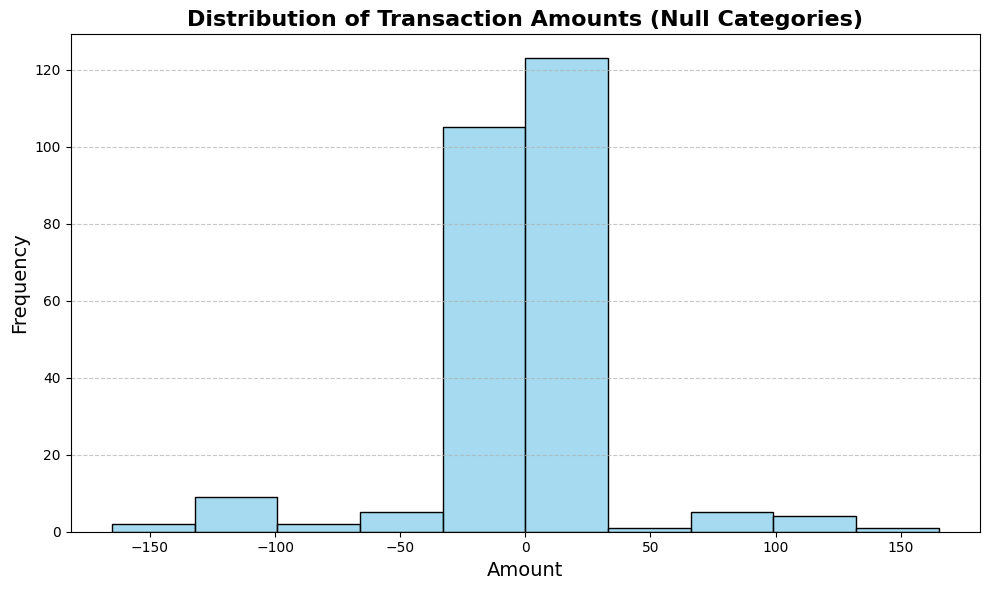

In [14]:
# Plot distribution of the 'amount' column for Null Categories
plt.figure(figsize=(10, 6))
sns.histplot(df_transaction.loc[df_transaction['category'].isnull()]['amount'], bins=10, color='skyblue', edgecolor='black')
plt.title("Distribution of Transaction Amounts (Null Categories)", fontsize=16, weight='bold')
plt.xlabel("Amount", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [15]:
df_transaction.loc[~df_transaction['category'].isnull()]['amount'].describe()

count    258522.000000
mean          2.549586
std          81.164803
min       -9162.460000
25%          -6.000000
50%          -1.880000
75%           2.000000
max        9397.830000
Name: amount, dtype: float64

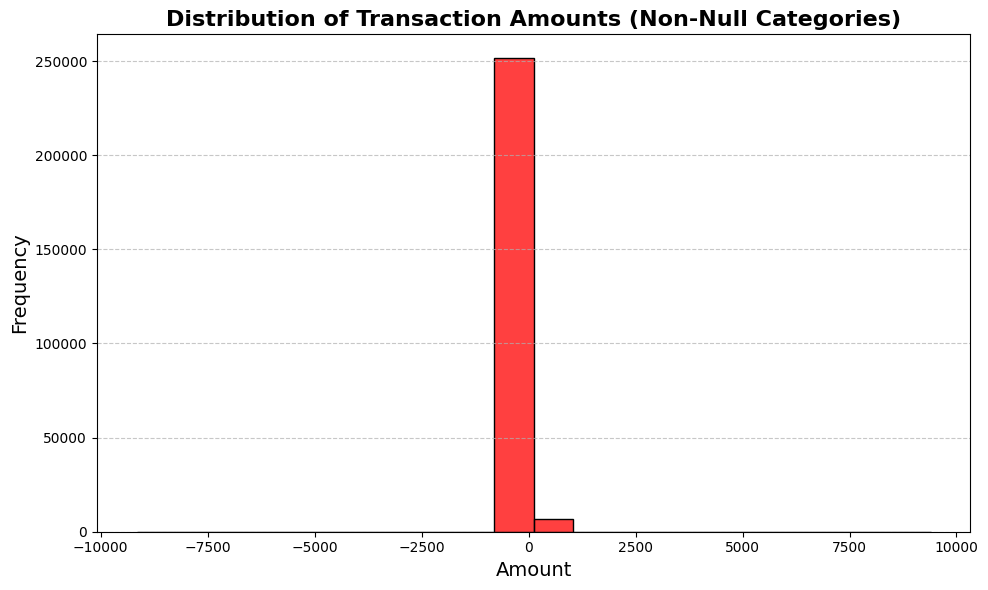

In [16]:
# Plot distribution of the 'amount' column
plt.figure(figsize=(10, 6))
sns.histplot(df_transaction.loc[~df_transaction['category'].isnull()]['amount'], bins=20, color='red', edgecolor='black')
plt.title("Distribution of Transaction Amounts (Non-Null Categories)", fontsize=16, weight='bold')
plt.xlabel("Amount", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

With the analysis above, we decide to drop rows with null values in the `category` column.

In [15]:
df_transaction = df_transaction.loc[~df_transaction['category'].isnull()]

##### 1.2 ID and Transaction date analysis

In [18]:
df_transaction.head(3)

client_id  bank_id  account_id  txn_id   txn_date  \
0          1        1           1       4 2023-09-29   
1          1        1           1       3 2023-08-14   
2          1        1           1       5 2023-09-25   

                                                                                                                        description  \
0                                                                           Earnin           PAYMENT                 Donatas Danyal   
1                                                       ONLINE TRANSFER FROM NDonatas DanyalDA O CARSON BUSINESS CHECKING 1216 1216   
2  MONEY TRANSFER                          AUTHORIZED ON   09/25 FROM Earnin CDAEJ_B                     CA  S583269001208168   111   

   amount         category  
0    20.0            Loans  
1    25.0  Transfer Credit  
2    20.0            Loans

In [19]:
print(f'No. of clients with transactions: {df_transaction.client_id.nunique()}')

No. of clients with transactions: 880


In [20]:
print(f'No. of banks: {df_transaction.bank_id.nunique()}')

No. of banks: 990


In [21]:
print(f'No. of accounts: {df_transaction.account_id.nunique()}')

No. of accounts: 1131


In [22]:
print(f'No. of transactions: {df_transaction.txn_id.nunique()}')

No. of transactions: 190319


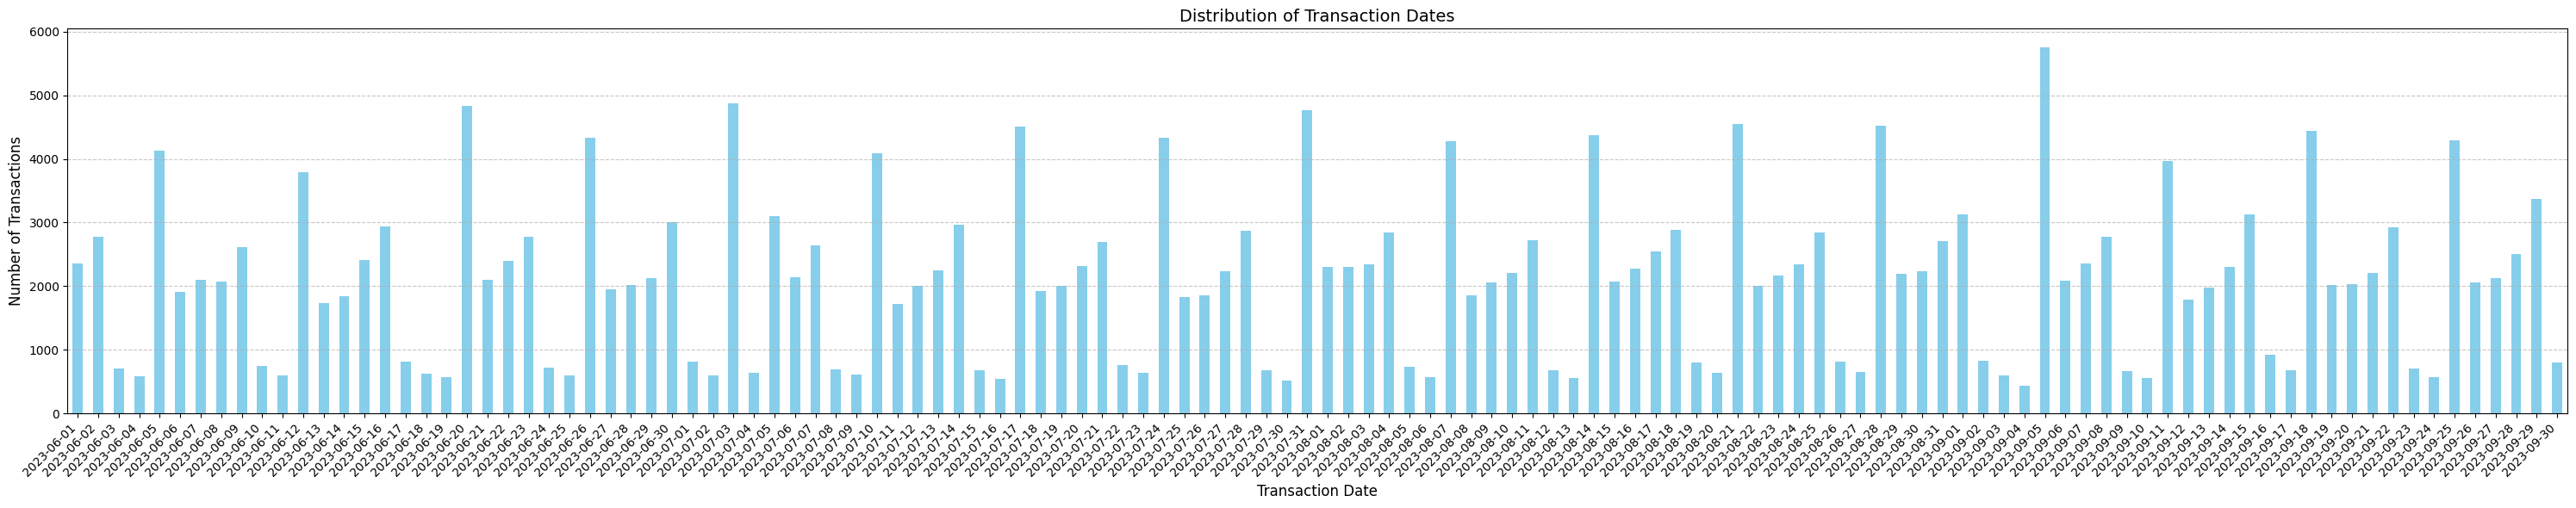

In [23]:
# Count the number of transactions per date
txn_count = df_transaction["txn_date"].dt.date.value_counts().sort_index()

# Plot the distribution
plt.figure(figsize=(30, 6))
txn_count.plot(kind="bar", color="skyblue")
plt.title("Distribution of Transaction Dates", fontsize=14)
plt.xlabel("Transaction Date", fontsize=12)
plt.ylabel("Number of Transactions", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

##### 1.3 WordClouds & Pre-processing

In [24]:
df_transaction.category.nunique()

33

In [25]:
df_transaction.category.value_counts(normalize=True)

category
Uncategorized                 0.113692
Third Party                   0.111070
Restaurants                   0.101991
Transfer Credit               0.083401
Loans                         0.075835
Convenience Stores            0.072063
Supermarkets and Groceries    0.064791
Transfer Debit                0.058463
Gas Stations                  0.049973
Internal Account Transfer     0.046352
Payroll                       0.031332
Shops                         0.028694
Bank Fees                     0.024880
Transfer                      0.024273
ATM                           0.021940
Transfer Deposit              0.019248
Digital Entertainment         0.017503
Utilities                     0.015929
Clothing and Accessories      0.012339
Department Stores             0.007744
Insurance                     0.006785
Service                       0.003520
Arts and Entertainment        0.001536
Travel                        0.001420
Food and Beverage Services    0.001327
Interest        

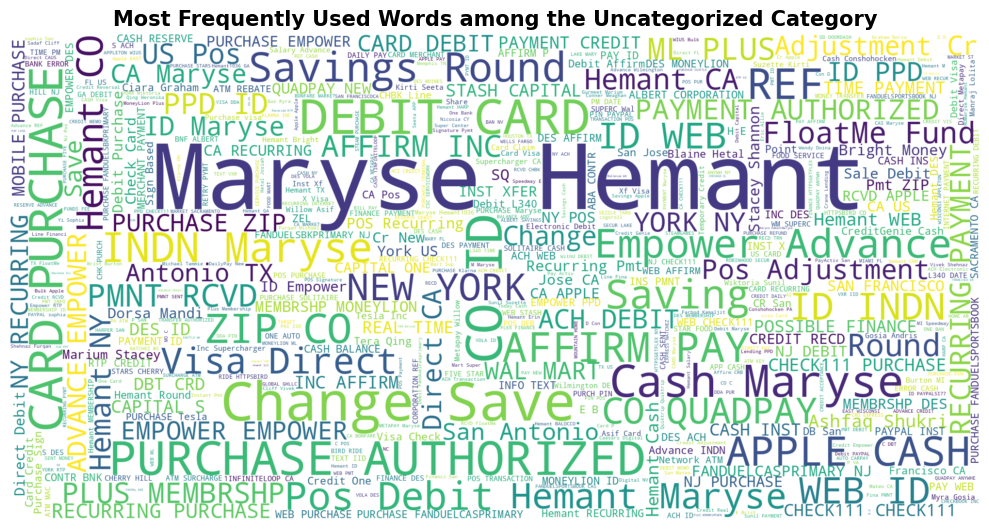

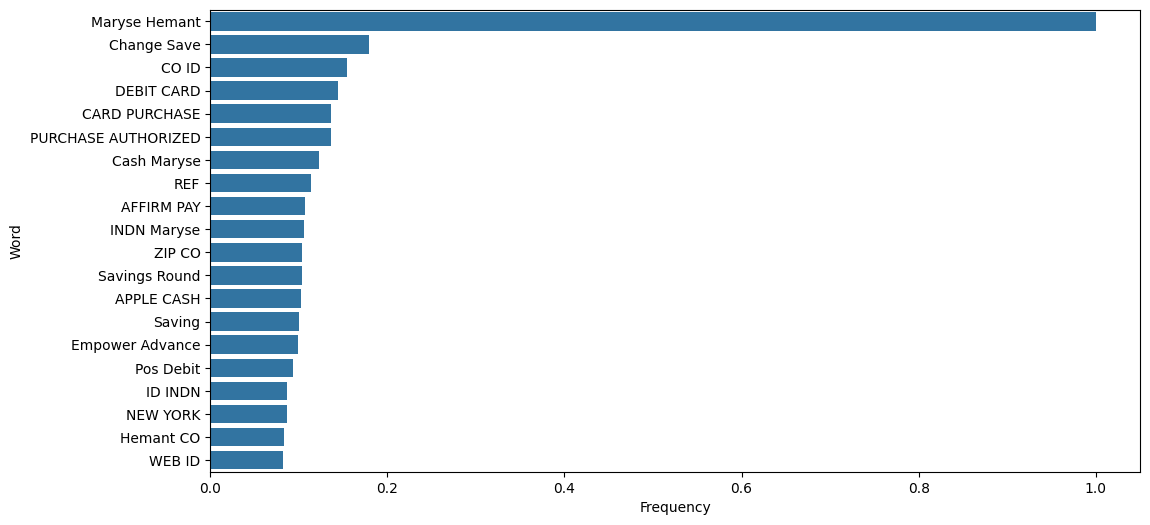

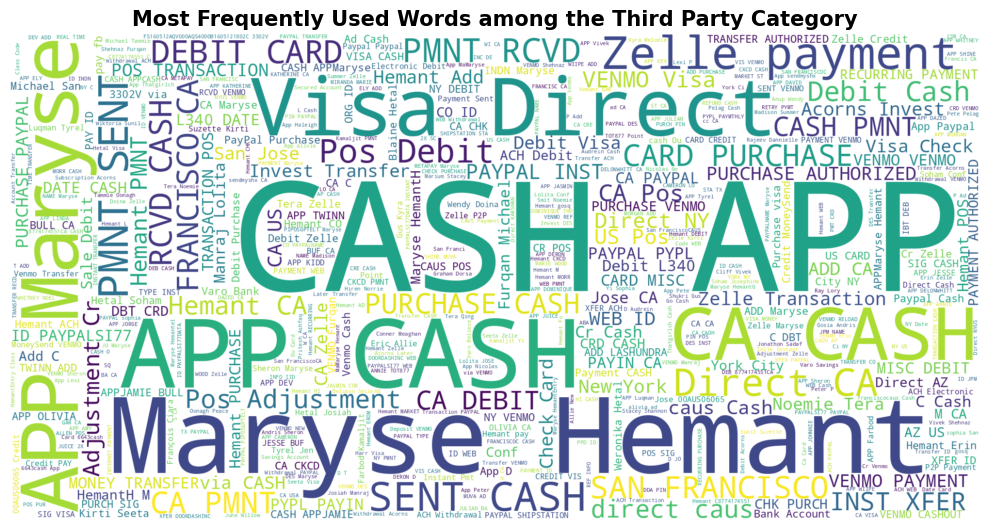

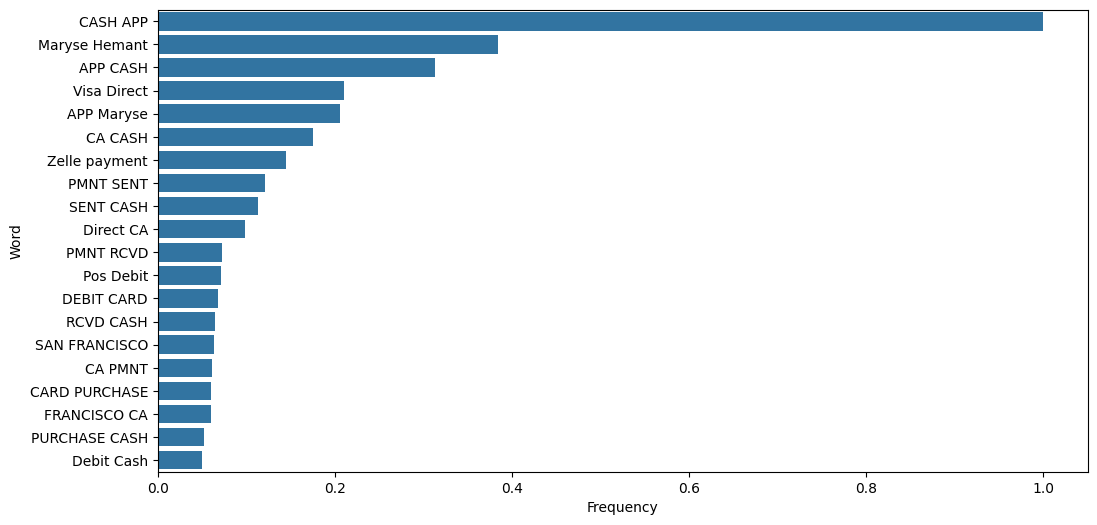

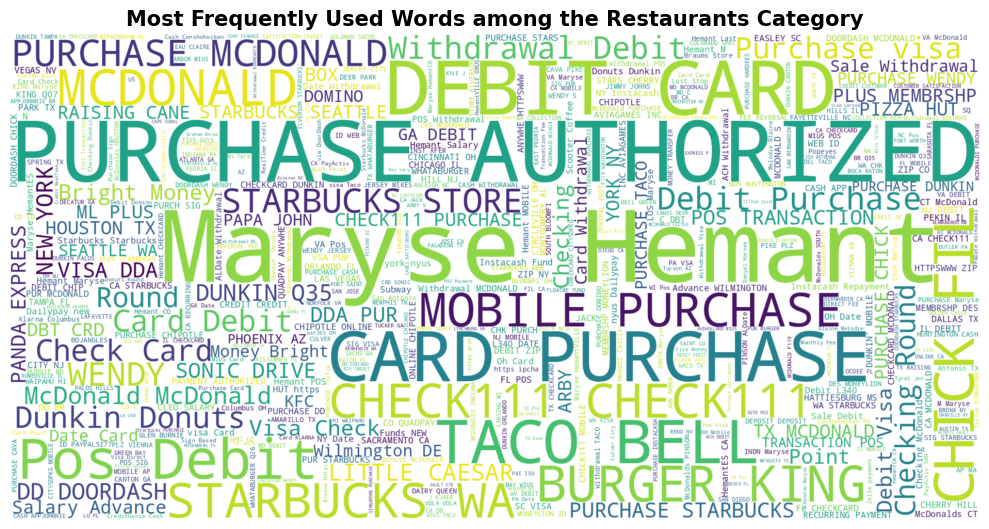

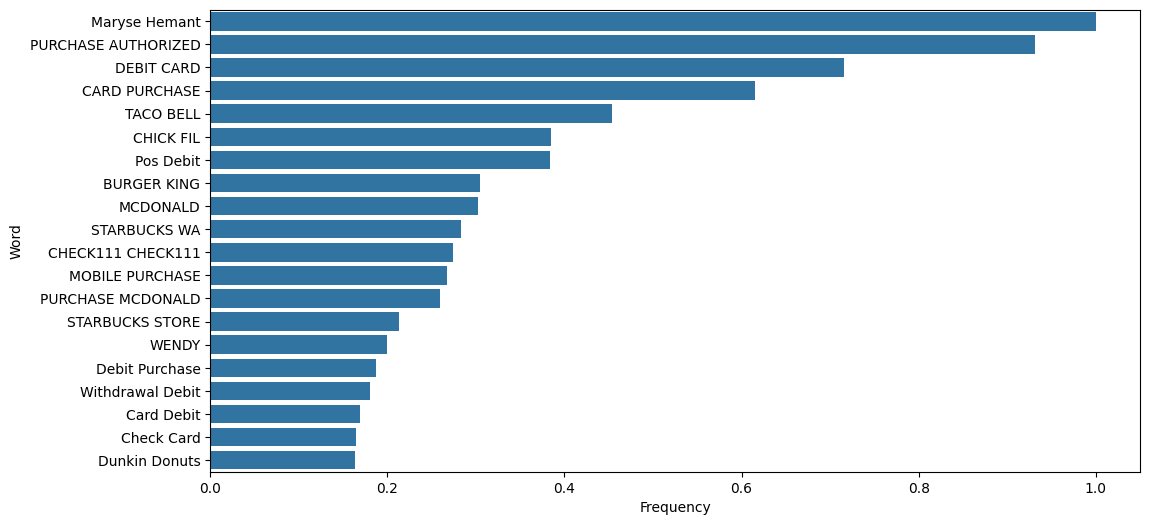

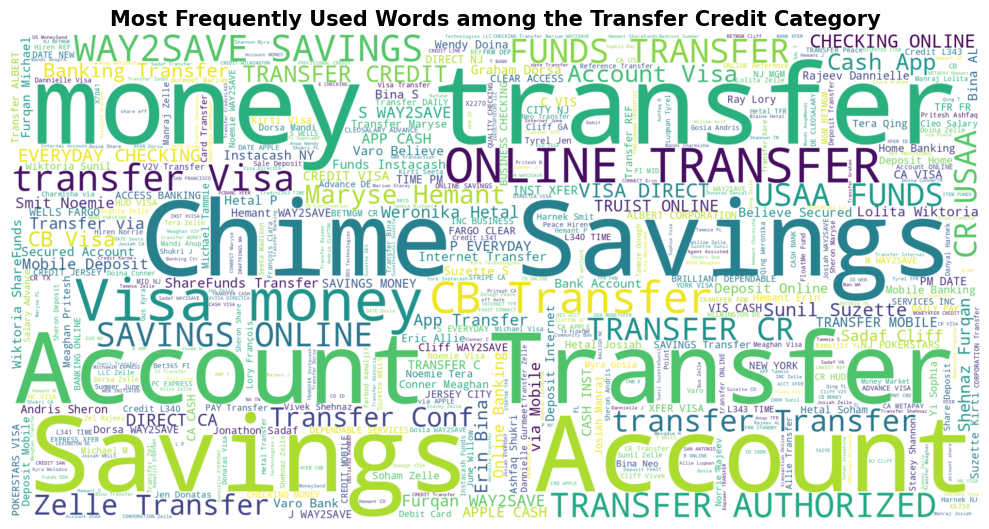

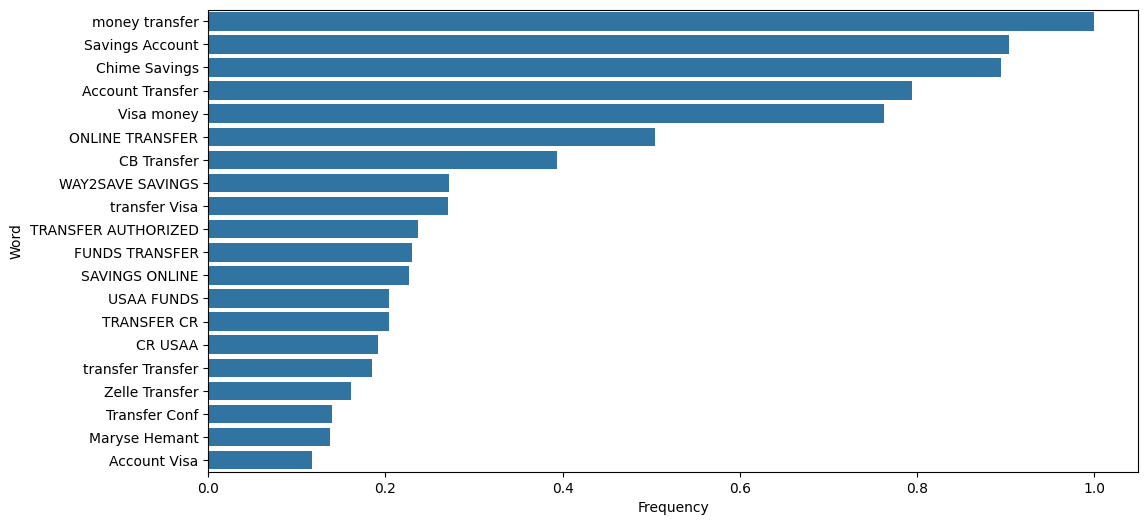

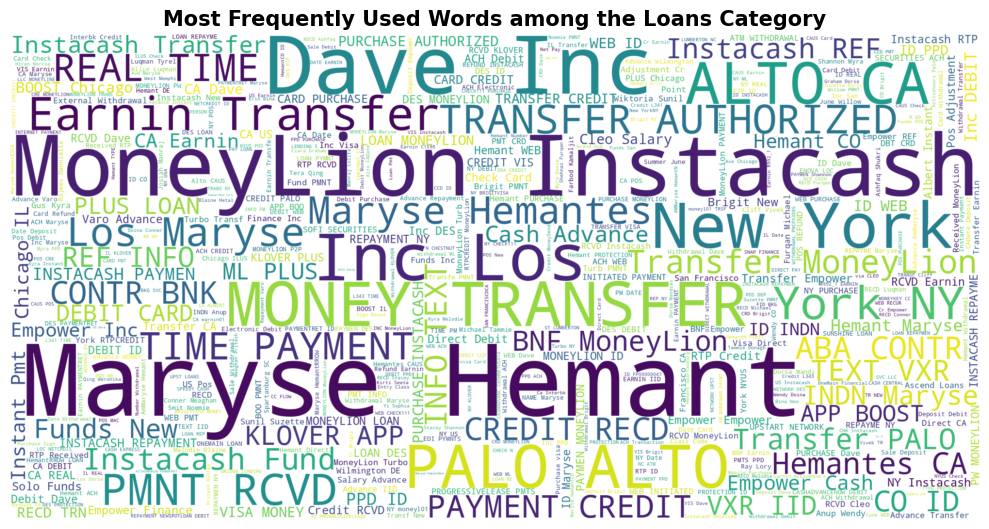

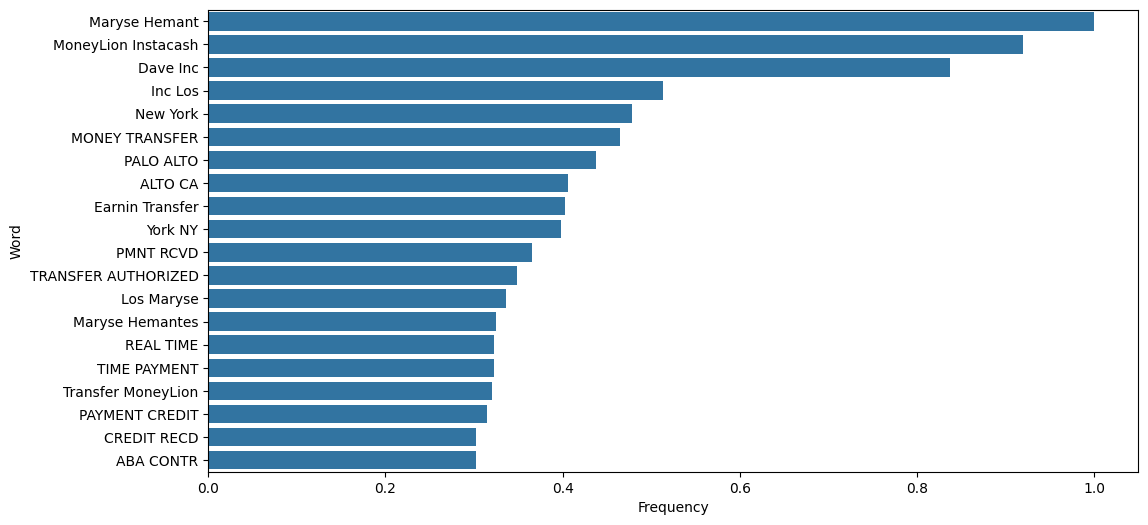

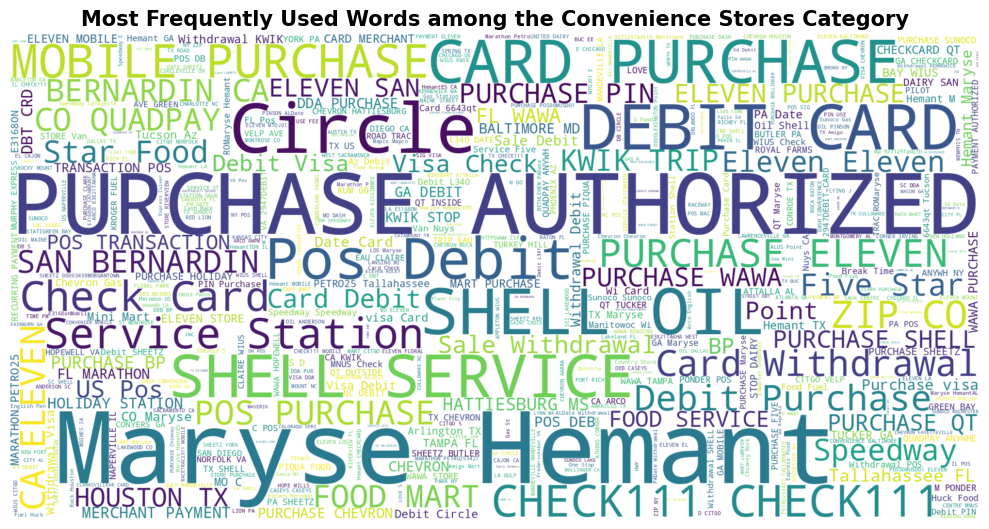

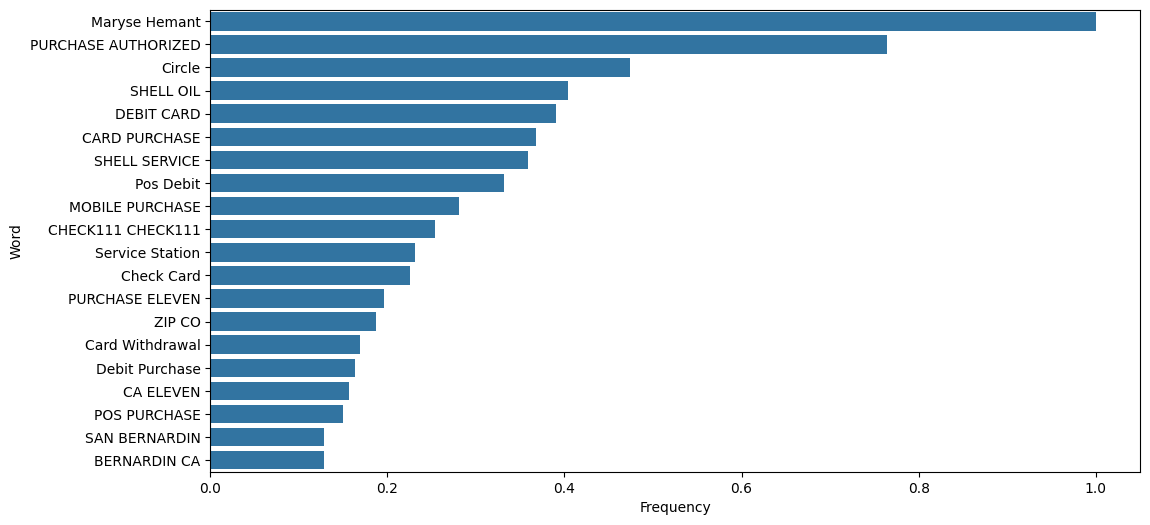

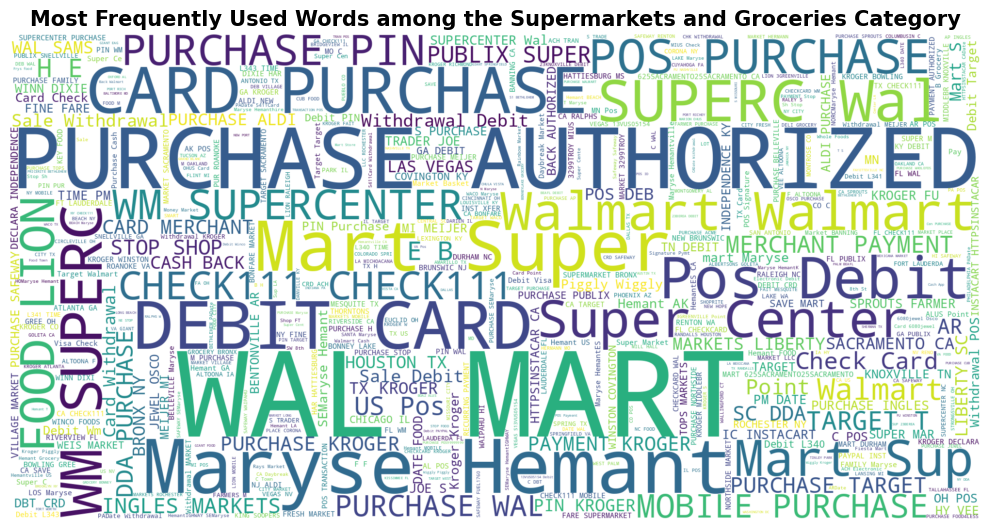

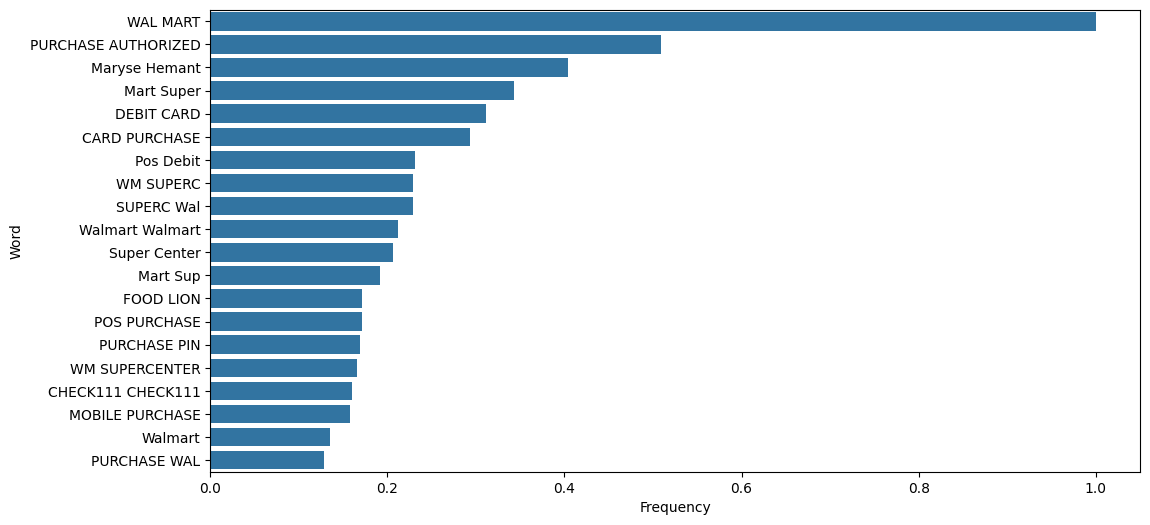

In [26]:
# Wordcloud of the 7 most sizeable categories (accounting for 60% of trasactions)
sizeable_categories = [
    'Uncategorized',
    'Third Party',
    'Restaurants',
    'Transfer Credit',
    'Loans',
    'Convenience Stores',
    'Supermarkets and Groceries',
]

for x in sizeable_categories:
    plot_wordcloud(
        category=x,
        title=f'Most Frequently Used Words among the {x} Category',
        df=df_transaction,
        text_col_in_df='description',
        max_words=500,
    )

In [27]:
df_transaction.loc[df_transaction['description'].str.contains('Maryse|Maryse Hemant|Hemant')]

client_id  bank_id  account_id  txn_id   txn_date  \
995            11        1           1     104 2023-09-21   
996            11        1           2      88 2023-07-07   
997            11        1           2      87 2023-09-01   
1000           11        1           1     111 2023-06-28   
1001           11        1           1     110 2023-08-04   
...           ...      ...         ...     ...        ...   
258760        880      489         558  113949 2023-07-17   
258761        880      489         558   40378 2023-07-12   
258768        880      488         557   95989 2023-09-25   
258769        880      488         557  147385 2023-07-17   
258770        880      488         557  118034 2023-08-08   

                                                                                 description  \
995     CASH APP*Maryse Hemant 09/21 #1872 PMNT RCVD CASH APP*Maryse Hemant SAN FRANCISCO CA   
996          Zelle Transfer Conf# g0000YiSW; Maryse Hemant et al v Google LLC Class Action S   
997                                         Zelle payment from Maryse Hemant Conf# 99a1jntmk   
1000                      STASH CAPITAL (S DES:ACH ID:1872 INDN:Maryse Hemant CO ID:1872 PPD   
1001           EMPLOYCO II, INC DES:PAYROLL ID:032398 INDN:Maryse Hemant CO ID:Maryse Hemant   
...                                                                                      ...   
258760                                                      Maryse Hemant TO STEPHEN ON 1036   
258761                                   APLFCU CK WEBXFR TRANSFER 230712 1036 Maryse Hemant   
258768                             SHOPPERS FOOD/ 09/25 #Maryse Hemant FOOD/PHA BALTIMORE MD   
258769                      WM SUPERCENTER 07/16 #3168 PURCHASE Wal-Mart Store Maryse Hemant   
258770                   BKOFAMMaryse Hemant ATM 08/08 #3168 WITHDRWL MIDDLESEX BALTIMORE MD   

         amount                    category  
995      19.650                 Third Party  
996      19.076       Digital Entertainment  
997      12.000                 Third Party  
1000      8.000               Uncategorized  
1001    210.656                     Payroll  
...         ...                         ...  
258760  -10.000               Uncategorized  
258761  -62.000              Transfer Debit  
258768   -7.196  Supermarkets and Groceries  
258769  -20.476  Supermarkets and Groceries  
258770   -4.000                         ATM  

[37969 rows x 8 columns]

In [28]:
df_transaction.loc[df_transaction['description'].str.contains('Maryse|Maryse Hemant|Hemant')].category.value_counts(normalize=True)

category
Uncategorized                 0.186758
Third Party                   0.185177
Transfer Debit                0.147989
Loans                         0.100213
Restaurants                   0.073349
Convenience Stores            0.062024
Gas Stations                  0.046933
Supermarkets and Groceries    0.044168
ATM                           0.026653
Transfer Credit               0.022992
Transfer                      0.018778
Clothing and Accessories      0.015039
Digital Entertainment         0.014486
Shops                         0.012036
Bank Fees                     0.010245
Insurance                     0.008876
Department Stores             0.006321
Utilities                     0.005136
Service                       0.004346
Transfer Deposit              0.002028
Payroll                       0.001607
Travel                        0.001317
Healthcare                    0.000895
Food and Beverage Services    0.000816
Internal Account Transfer     0.000737
Telecommunicatio

In [29]:
df_transaction.loc[df_transaction['description'].str.contains('CHECK111')]

client_id  bank_id  account_id  txn_id   txn_date description  amount  \
967            10        1           1      31 2023-08-14    CHECK111  18.784   
1221           13        1           1      78 2023-09-20    CHECK111   6.672   
1609           18        1           1       5 2023-08-03    CHECK111   2.068   
1710           18        1           1     107 2023-09-05    CHECK111   7.836   
7881           79        1           1     126 2023-08-10    CHECK111   1.534   
...           ...      ...         ...     ...        ...         ...     ...   
258767        880      488         557   17761 2023-09-26    CHECK111  -0.908   
258771        880      488         557  152928 2023-09-07    CHECK111  -2.000   
258772        880      488         557  107883 2023-09-22    CHECK111  -1.542   
258774        880      488         557   19800 2023-08-14    CHECK111  -2.664   
258775        880      488         557     718 2023-07-03    CHECK111  -8.842   

                          category  
967       Clothing and Accessories  
1221                 Uncategorized  
1609      Clothing and Accessories  
1710      Clothing and Accessories  
7881    Supermarkets and Groceries  
...                            ...  
258767                 Restaurants  
258771                Gas Stations  
258772                 Restaurants  
258774                 Restaurants  
258775  Supermarkets and Groceries  

[6697 rows x 8 columns]

In [30]:
df_transaction.loc[df_transaction['description'].str.contains('CHECK111')].category.value_counts(normalize=True)

category
Restaurants                   0.208153
Gas Stations                  0.162909
Supermarkets and Groceries    0.151411
Uncategorized                 0.147081
Convenience Stores            0.133194
Shops                         0.056593
Loans                         0.033746
Digital Entertainment         0.027027
Third Party                   0.018217
Insurance                     0.014185
Clothing and Accessories      0.013737
Utilities                     0.011348
Service                       0.009557
Department Stores             0.007167
Bank Fees                     0.003584
Healthcare                    0.001195
Food and Beverage Services    0.000597
Travel                        0.000149
Arts and Entertainment        0.000149
Name: proportion, dtype: float64

In [31]:
df_transaction.loc[df_transaction['description'].str.contains('MoneyLion')]

client_id  bank_id  account_id  txn_id   txn_date  \
15              2        1           2      56 2023-09-16   
16              2        1           2      21 2023-08-16   
18              2        1           2      69 2023-08-14   
19              2        1           2      68 2023-09-26   
23              2        1           2      62 2023-09-16   
...           ...      ...         ...     ...        ...   
252340        880      543         622   56551 2023-09-18   
254853        880      296         332  168523 2023-07-21   
256005        880      254         286  177620 2023-06-16   
256020        880      254         286   73216 2023-06-27   
256337        880      282         318  120960 2023-07-17   

                                                     description  amount  \
15                                           MoneyLion Instacash  10.000   
16                                           MoneyLion Instacash  19.000   
18                                           MoneyLion Instacash  20.000   
19                                           MoneyLion Instacash  20.000   
23                                           MoneyLion Instacash  20.000   
...                                                          ...     ...   
252340                                       MoneyLion Plus Loan  -4.488   
254853                                       MoneyLion Plus Loan  -8.972   
256005  MoneyLion        PAYMENT                    PPD ID: 1036  -1.028   
256020                            MoneyLion PAYMENT PPD ID: 1036  -1.020   
256337                                 MoneyLion Plus Membership  -1.998   

             category  
15              Loans  
16              Loans  
18              Loans  
19              Loans  
23              Loans  
...               ...  
252340          Loans  
254853          Loans  
256005          Loans  
256020          Loans  
256337  Uncategorized  

[3194 rows x 8 columns]

In [32]:
df_transaction.loc[df_transaction['description'].str.contains('MoneyLion')].category.value_counts(normalize=True)

category
Loans                        0.982154
Uncategorized                0.016594
Internal Account Transfer    0.000939
Payroll                      0.000313
Name: proportion, dtype: float64

In [16]:
df_transaction = df_transaction.loc[~df_transaction['description'].str.contains('CHECK111')]

In [17]:
stopwords_list = ['maryse', 'maryse hemant', 'hemant']

# Pre-process the raw text for uni-gram/bi-gram analysis
df_transaction['description_stem'] = df_transaction['description'].map(lambda x: stem_text(raw_text=x, stopwords_list=stopwords_list))

/home/faiq0913/Personal-Projects/moneylion-financial-transaction-classification/notebooks/faiq_utils.py:31: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_text, "html.parser").get_text()


In [18]:
df_transaction.head(3)

client_id  bank_id  account_id  txn_id   txn_date  \
0          1        1           1       4 2023-09-29   
1          1        1           1       3 2023-08-14   
2          1        1           1       5 2023-09-25   

                                                                                                                        description  \
0                                                                           Earnin           PAYMENT                 Donatas Danyal   
1                                                       ONLINE TRANSFER FROM NDonatas DanyalDA O CARSON BUSINESS CHECKING 1216 1216   
2  MONEY TRANSFER                          AUTHORIZED ON   09/25 FROM Earnin CDAEJ_B                     CA  S583269001208168   111   

   amount         category                                   description_stem  
0    20.0            Loans                       earnin payment donata danyal  
1    25.0  Transfer Credit  onlin transfer ndonata danyalda carson busi check  
2    20.0            Loans            money transfer author earnin cdaej b ca

In [36]:
# Reindex the dataframe
df_transaction.reset_index(drop=True, inplace=True)

In [37]:
df_transaction.loc[3]['description']

'ONLINE TRANSFER FROM CARSON N EVERYDAY CHECKING 1216 1216'

In [38]:
df_transaction.loc[3]['description_stem']

'onlin transfer carson n everyday check'

##### 1.4 Remove reviews that do not have any meaningful words

In [19]:
# Find the number of meaningful words in each transaction
df_transaction['description_clean_len'] = df_transaction['description_stem'].str.split().map(len)

In [20]:
# There are 8 transactions that do not have any meaningful words
df_transaction[df_transaction['description_clean_len']==0].shape

(2749, 10)

In [21]:
df_transaction[df_transaction['description_clean_len']==0]

client_id  bank_id  account_id  txn_id            txn_date  \
15476         156        1           1     139 2023-07-20 00:00:00   
15536         156        1           1     135 2023-07-07 00:00:00   
16528         165        1           1      15 2023-08-31 00:00:00   
16536         165        1           1      21 2023-06-09 00:00:00   
16543         165        1           1       3 2023-07-06 00:00:00   
...           ...      ...         ...     ...                 ...   
257723        880      520         596     445 2023-06-27 00:00:00   
257872        880      477         543  173174 2023-08-10 07:52:05   
258020        880      472         538   21491 2023-06-05 00:00:00   
258077        880      313         349   17350 2023-08-11 00:00:00   
258468        880      497         568  166735 2023-06-24 19:00:00   

                                                 description   amount  \
15476                             Maryse Hemant 258597 07/21   22.000   
15536                                     Maryse Hemant: 270   80.000   
16528                                          Maryse Hemant   41.638   
16536                                          Maryse Hemant   51.384   
16543                                          Maryse Hemant   41.736   
...                                                      ...      ...   
257723                                         Maryse Hemant  -16.000   
257872                                         Maryse Hemant   -0.656   
258020  Maryse Hemant TO Maryse Hemant Maryse Hemant ON 1036 -143.000   
258077                                         Maryse Hemant  -55.440   
258468                                         Maryse Hemant   -4.006   

                 category description_stem  description_clean_len  
15476               Loans                                       0  
15536               Loans                                       0  
16528         Restaurants                                       0  
16536             Payroll                                       0  
16543             Payroll                                       0  
...                   ...              ...                    ...  
257723      Uncategorized                                       0  
257872        Restaurants                                       0  
258020      Uncategorized                                       0  
258077        Restaurants                                       0  
258468  Department Stores                                       0  

[2749 rows x 10 columns]

In [22]:
# Drop the transactions that do not have any meaningful words
df_transaction = df_transaction.drop(df_transaction[df_transaction['description_clean_len']==0].index)

In [23]:
# Reindex the dataframe
df_transaction.reset_index(drop=True, inplace=True)

##### 1.5 Uni-grams & Bi-grams for sizeable categories & Weekend vs Weekday transactions

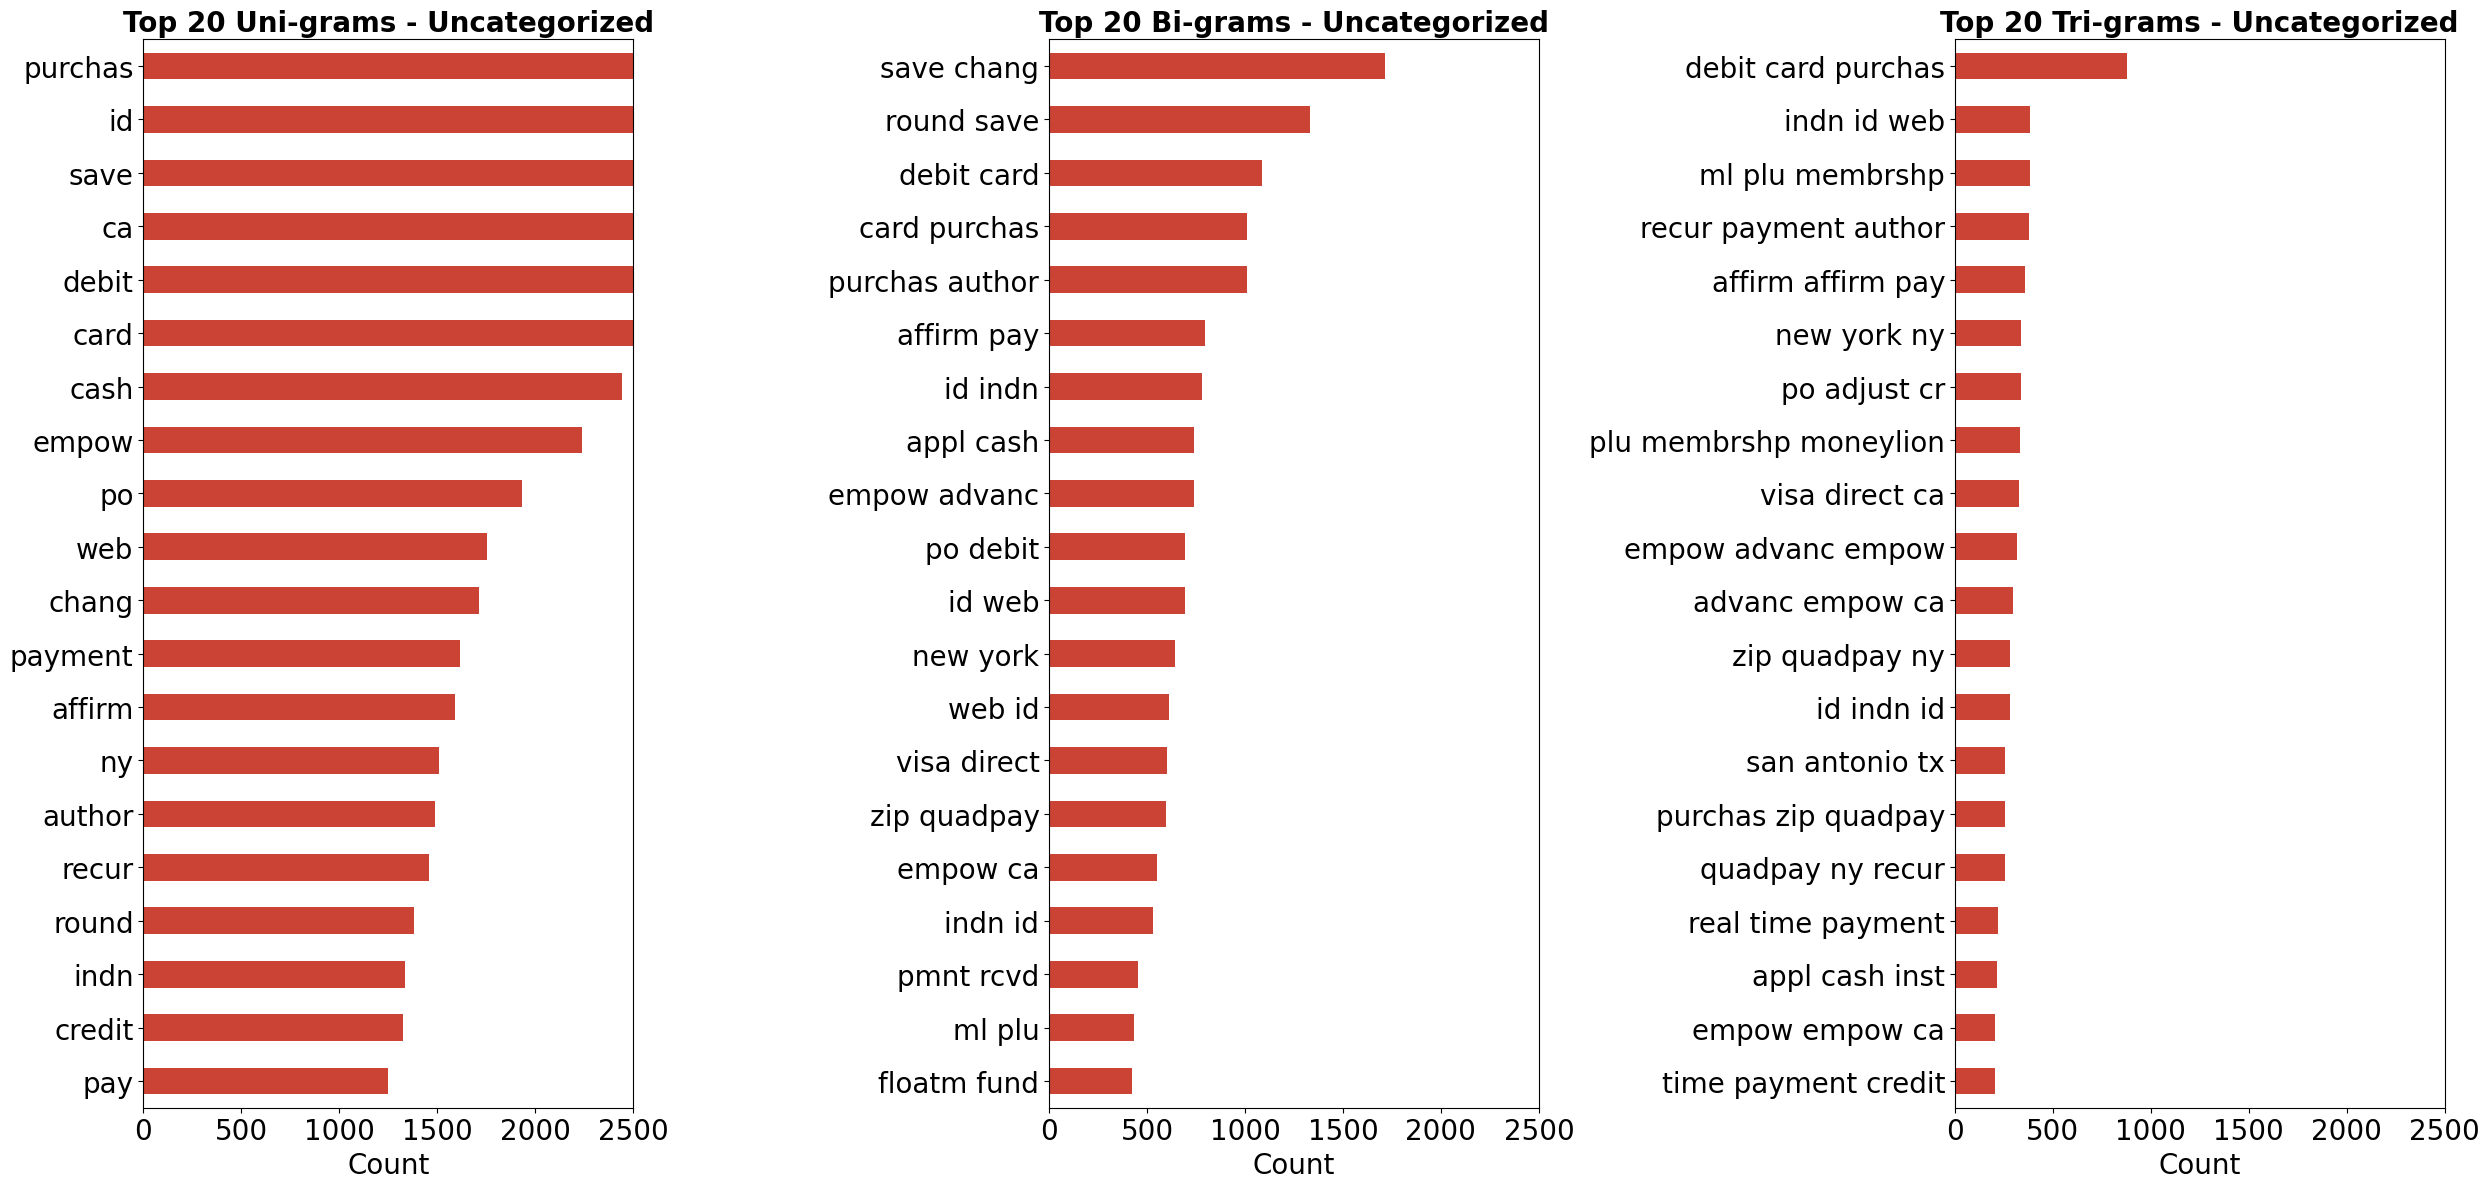

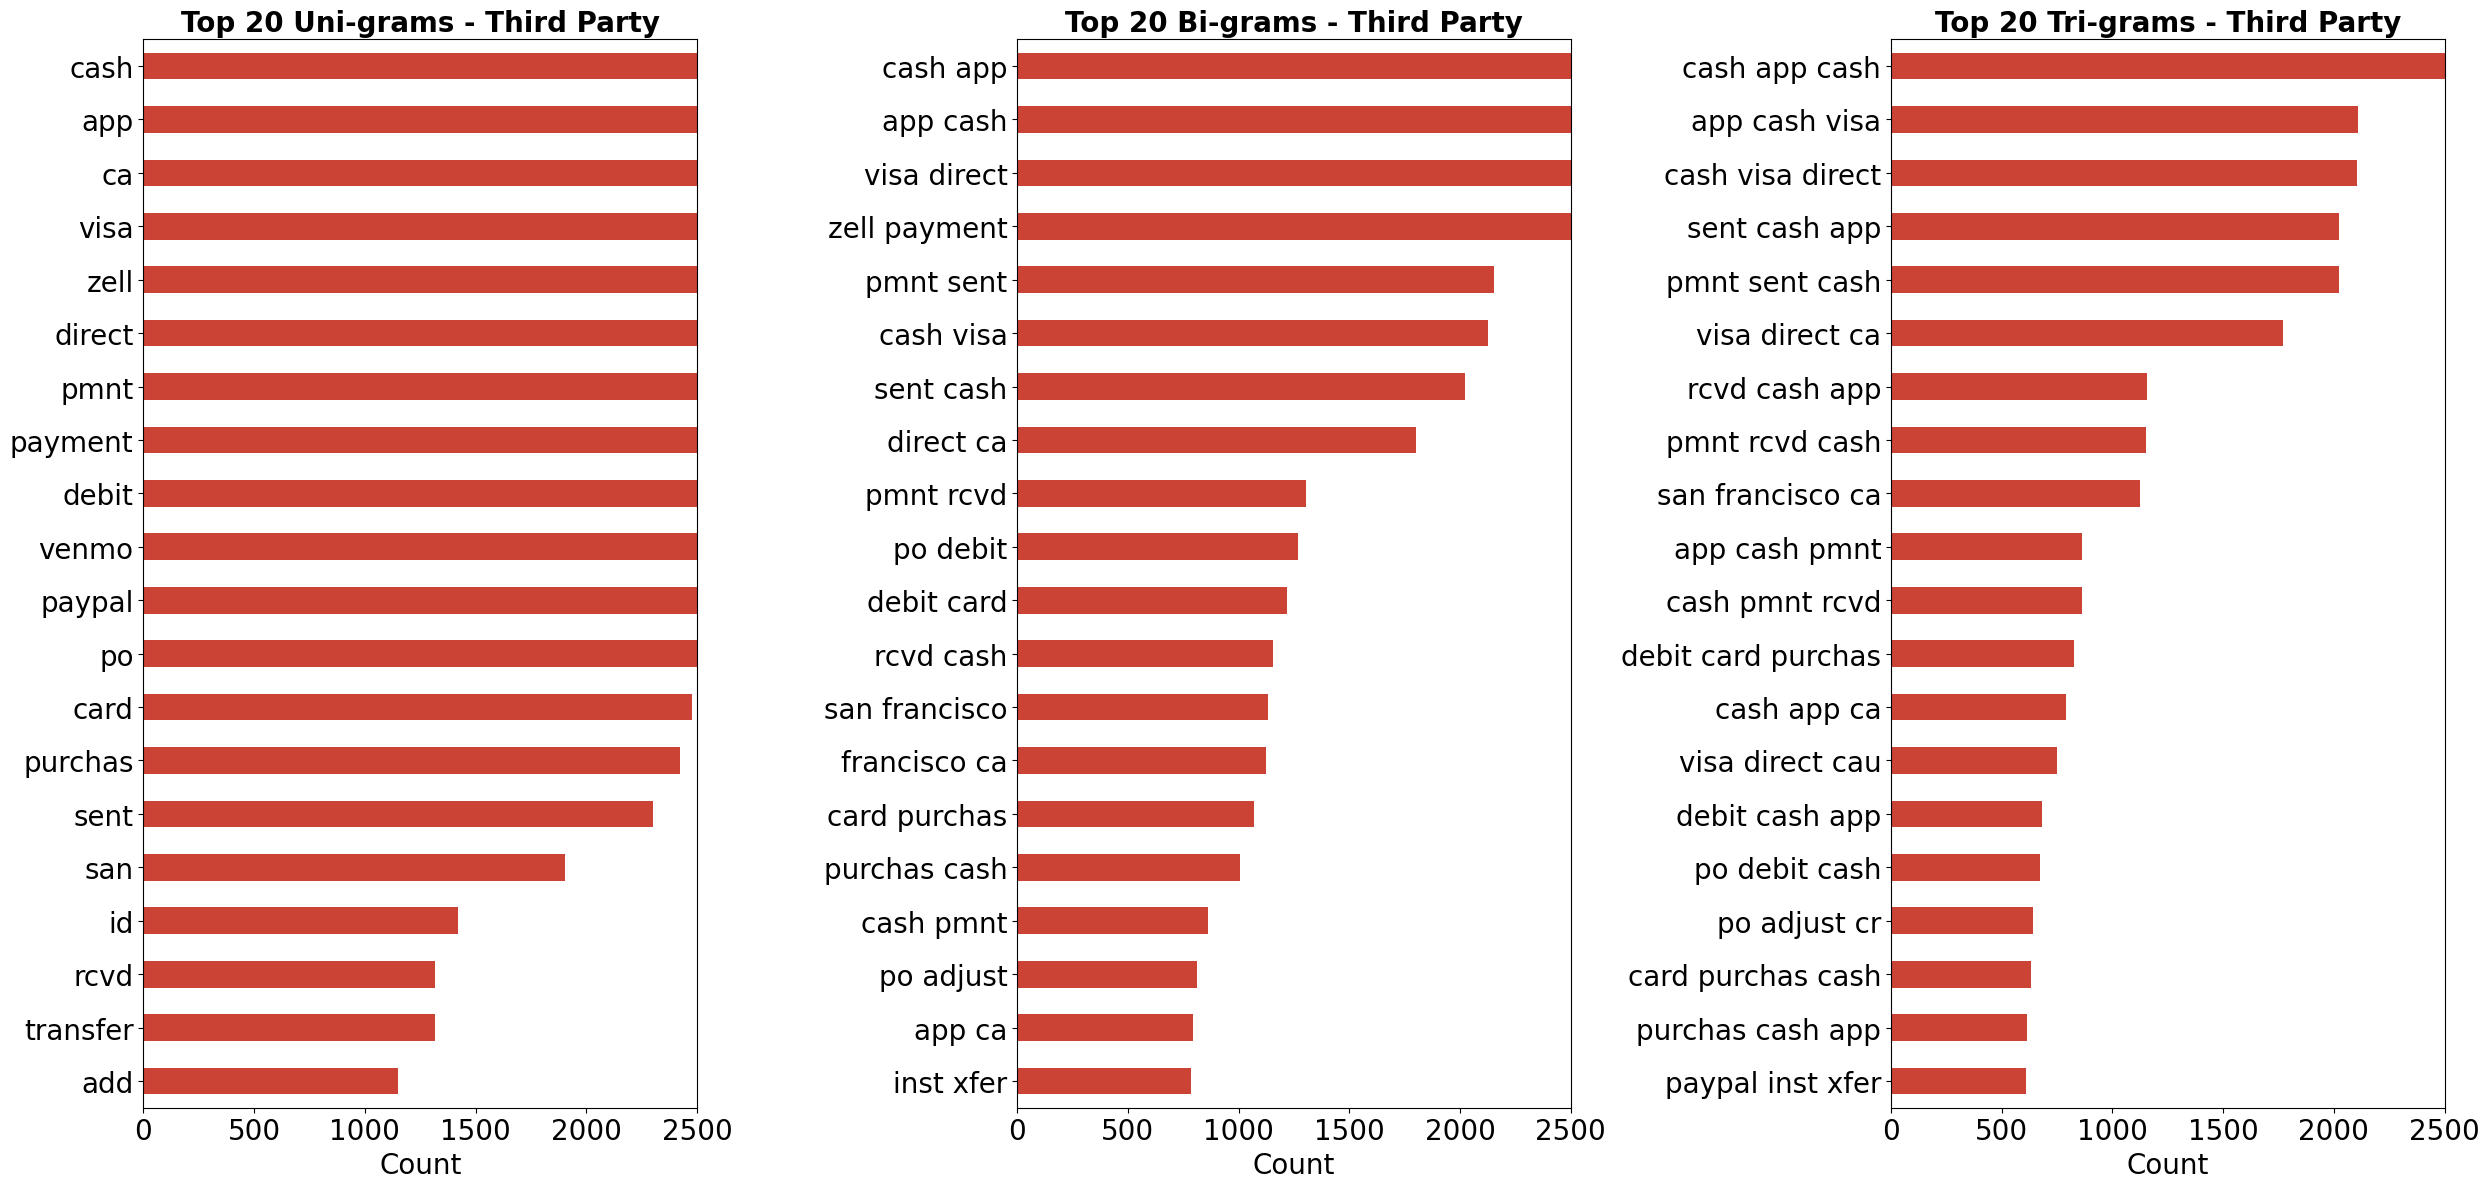

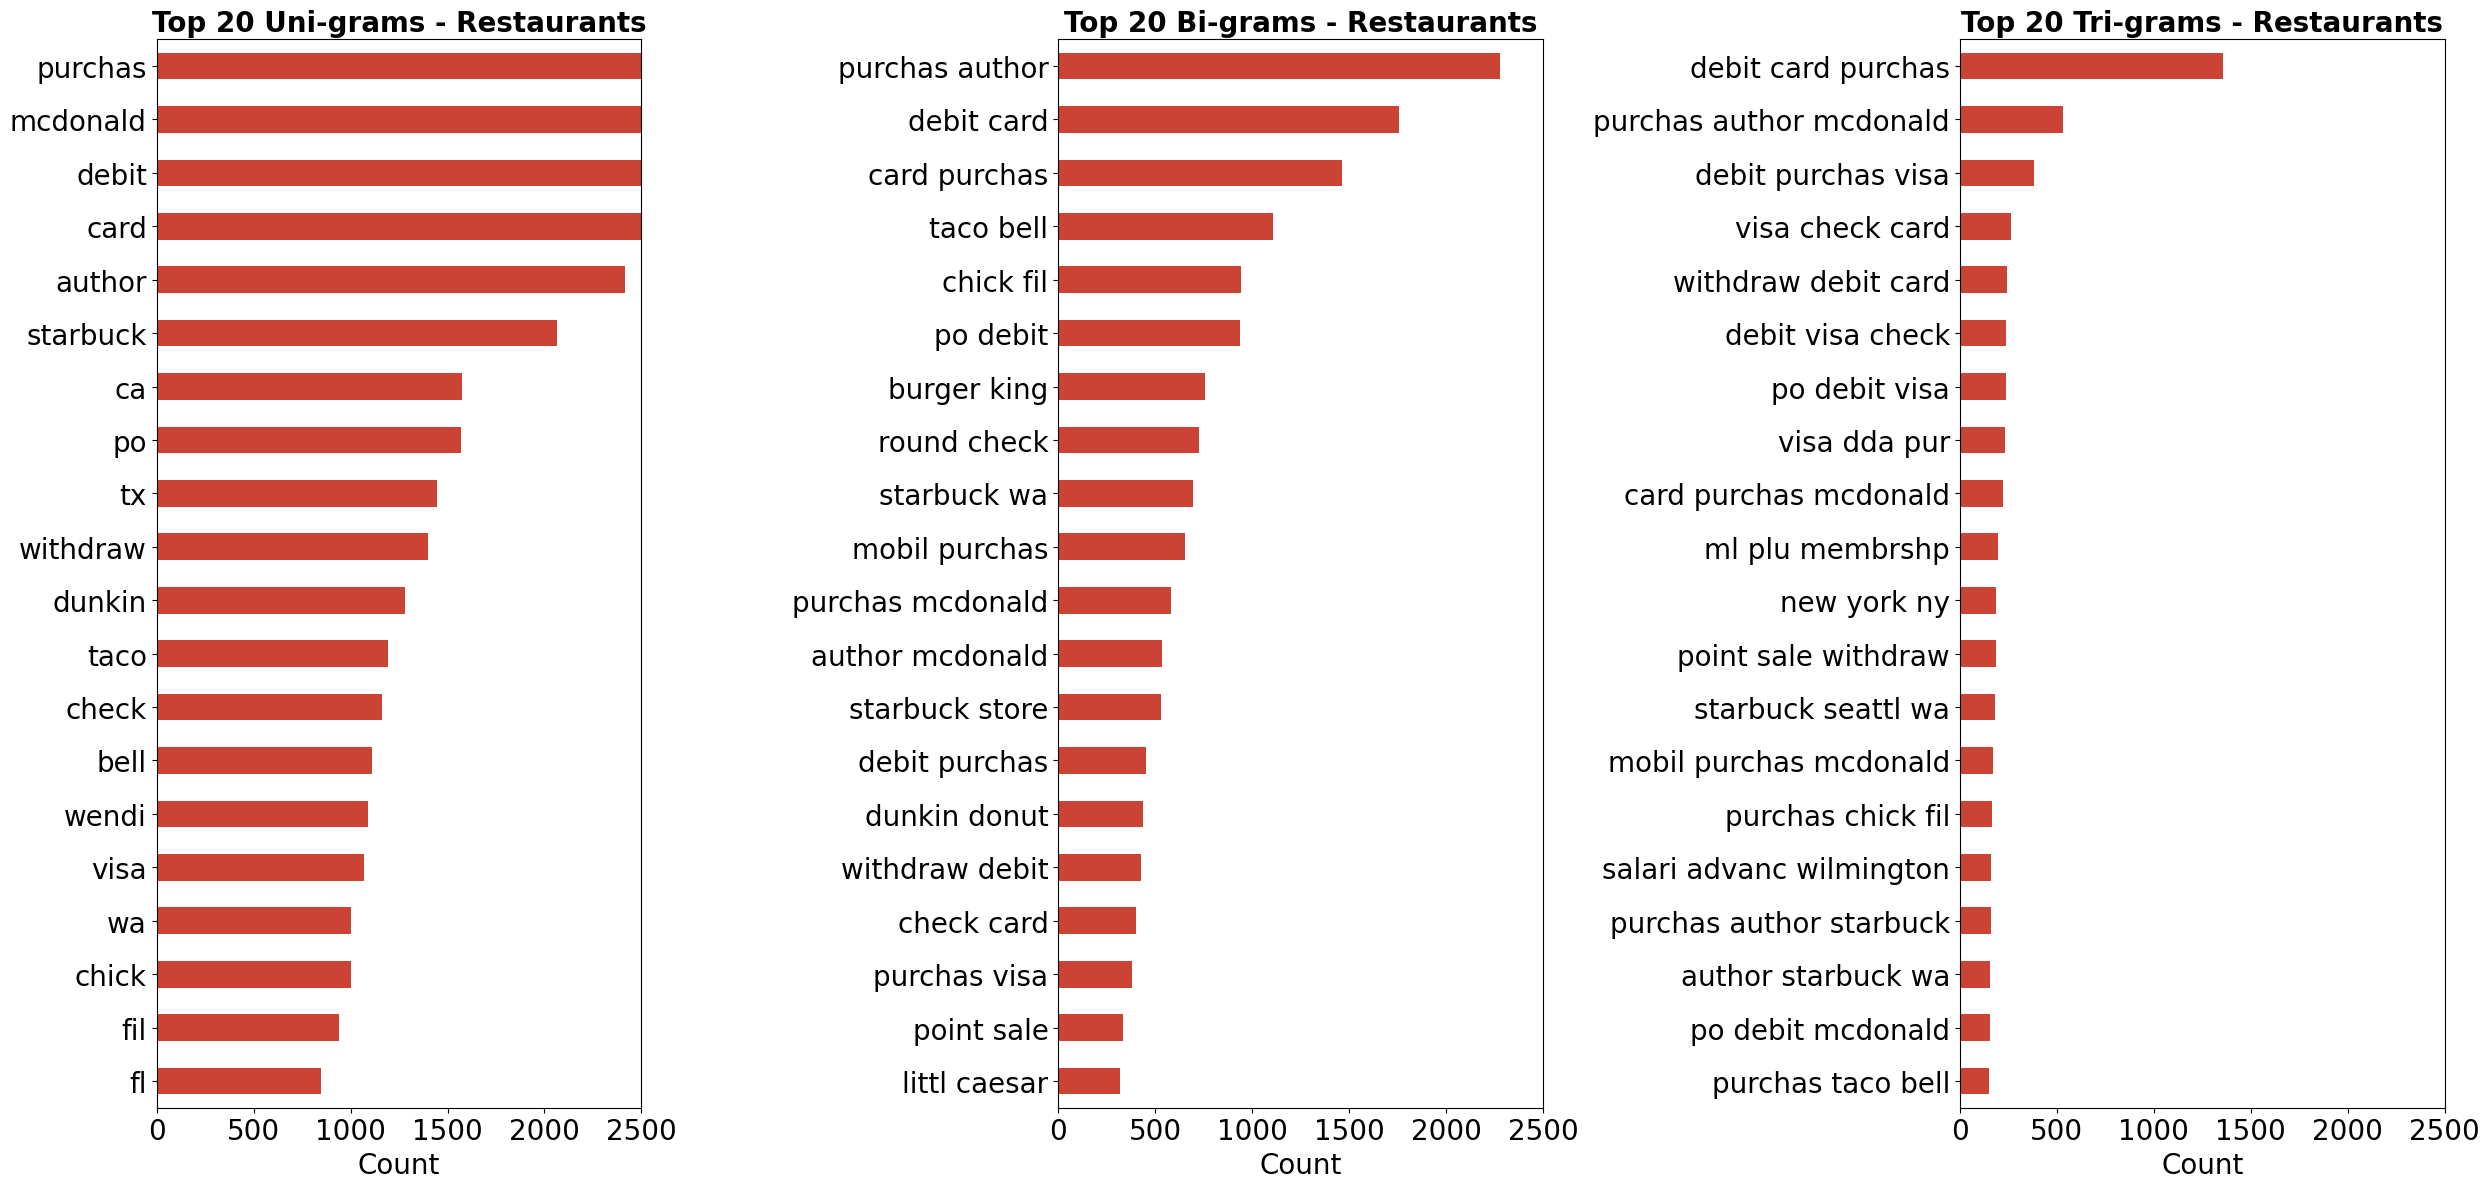

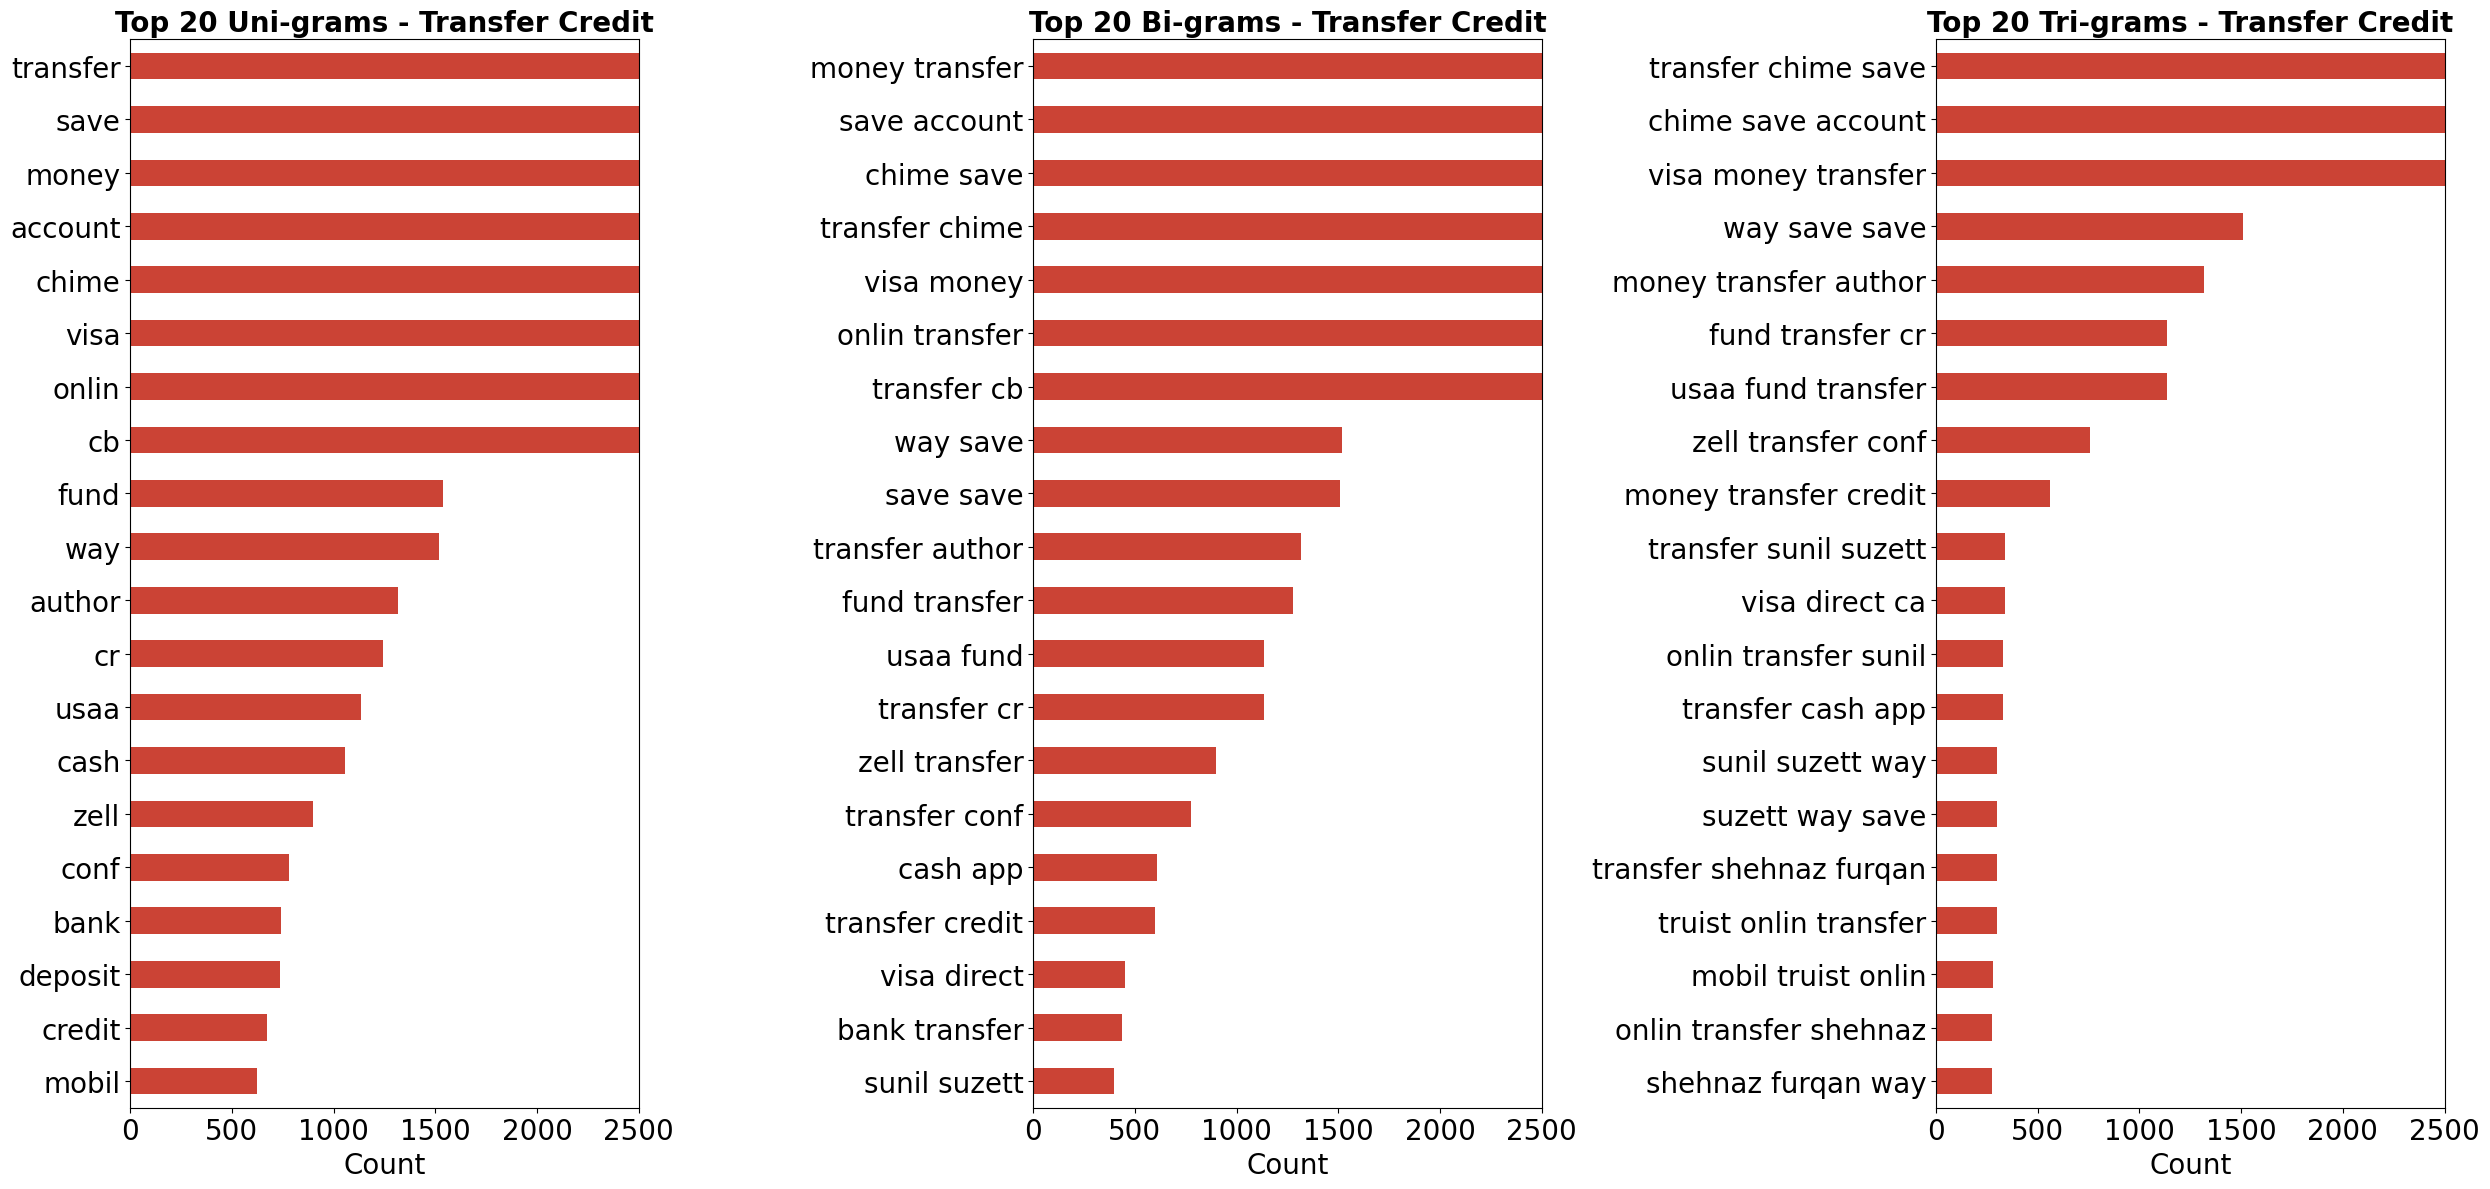

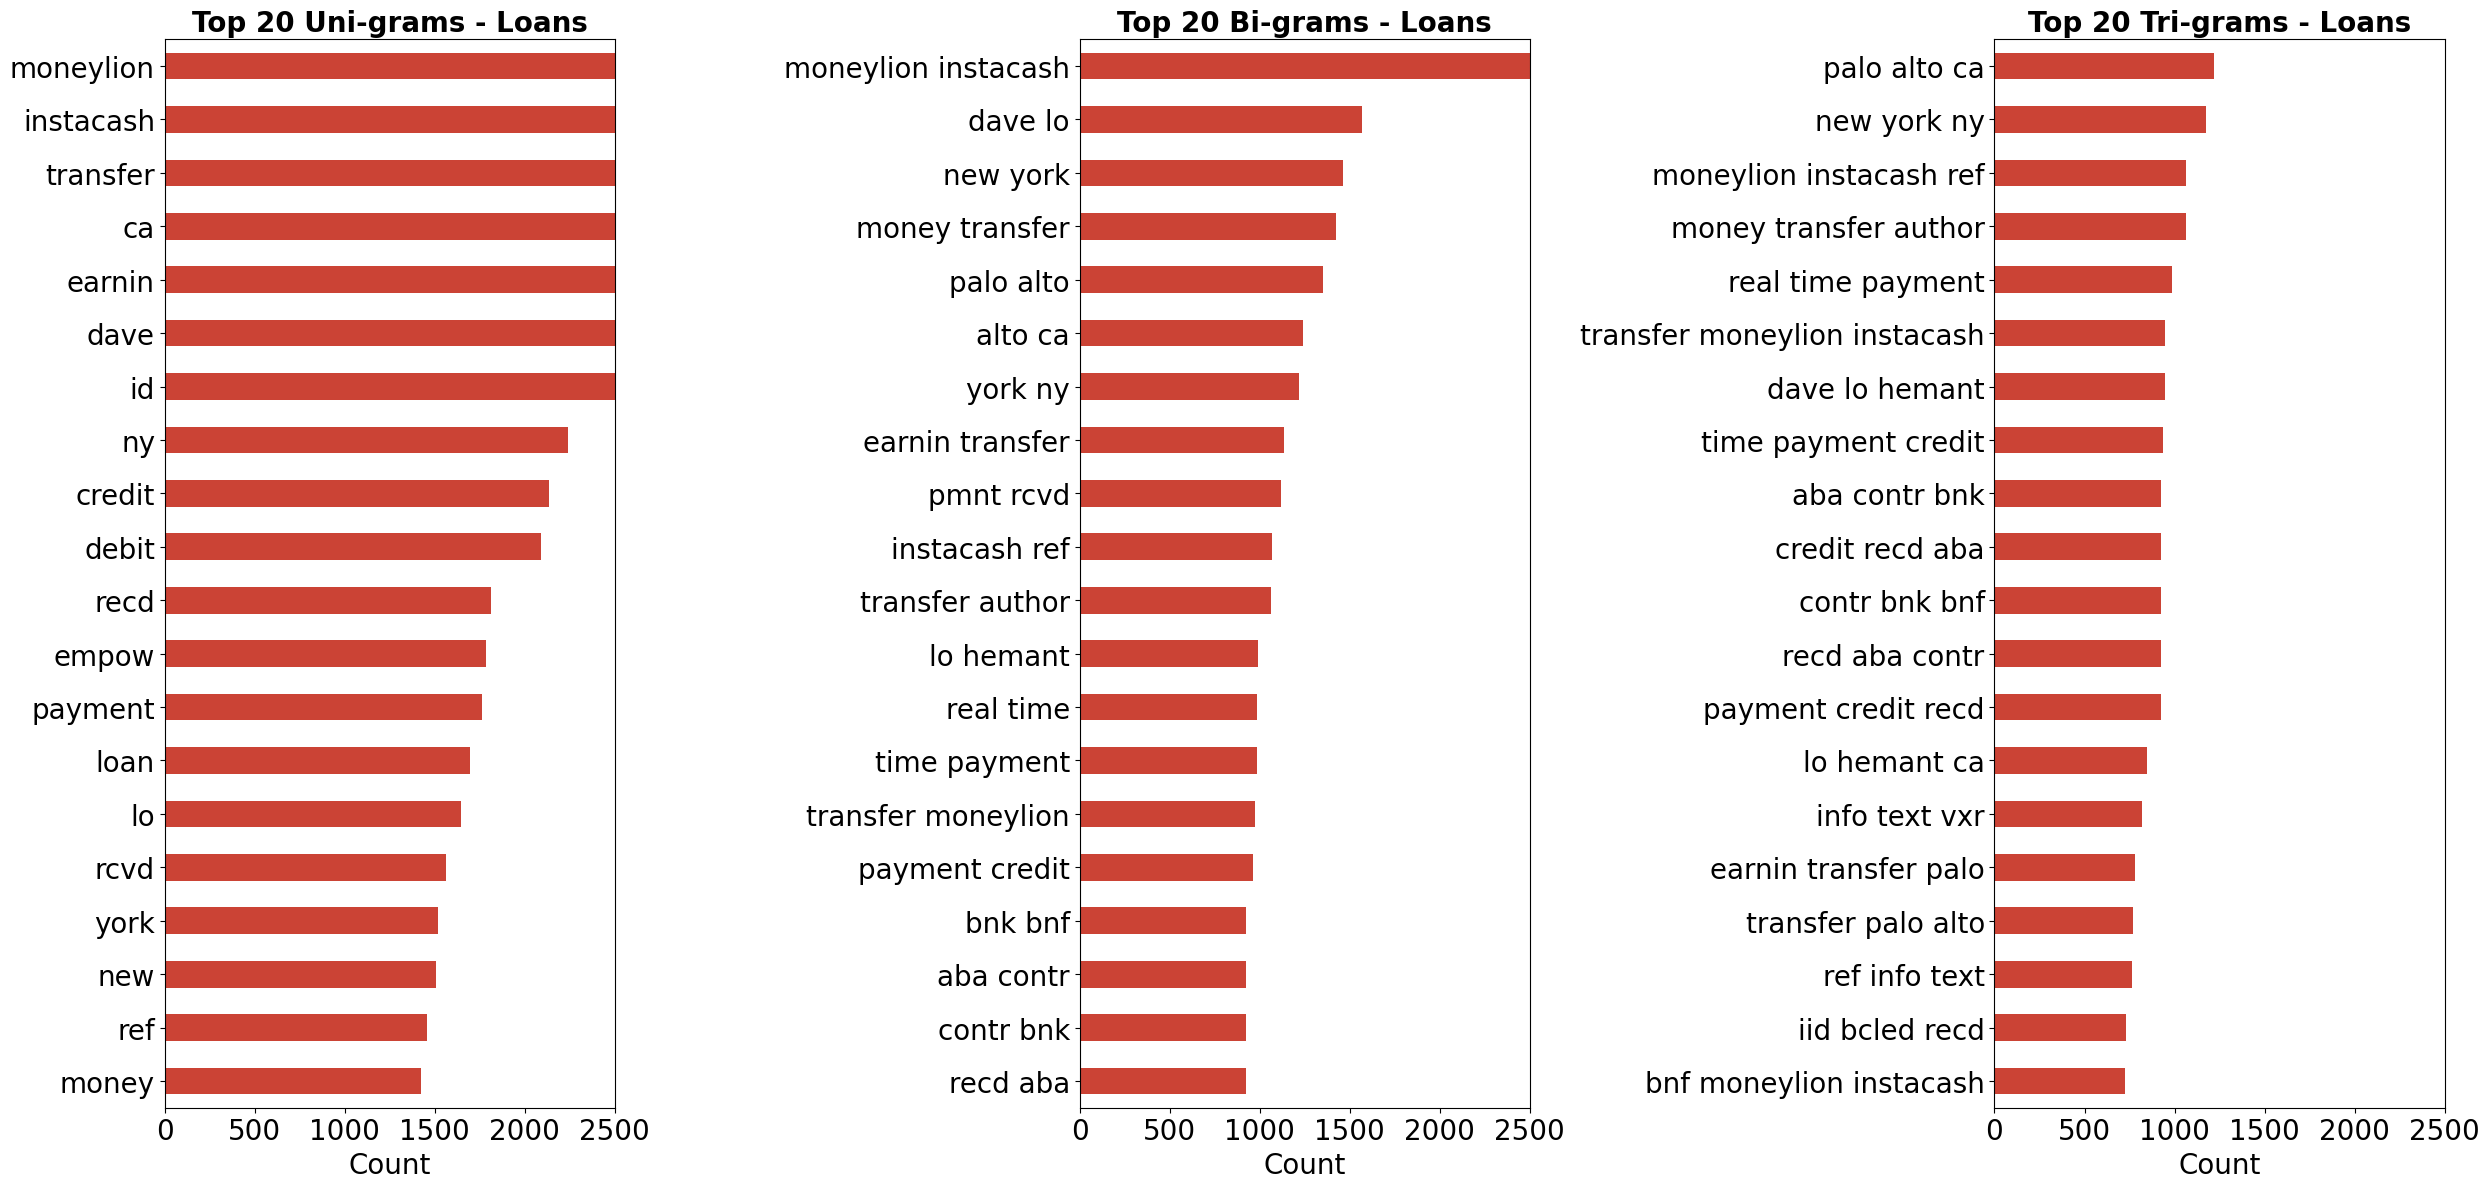

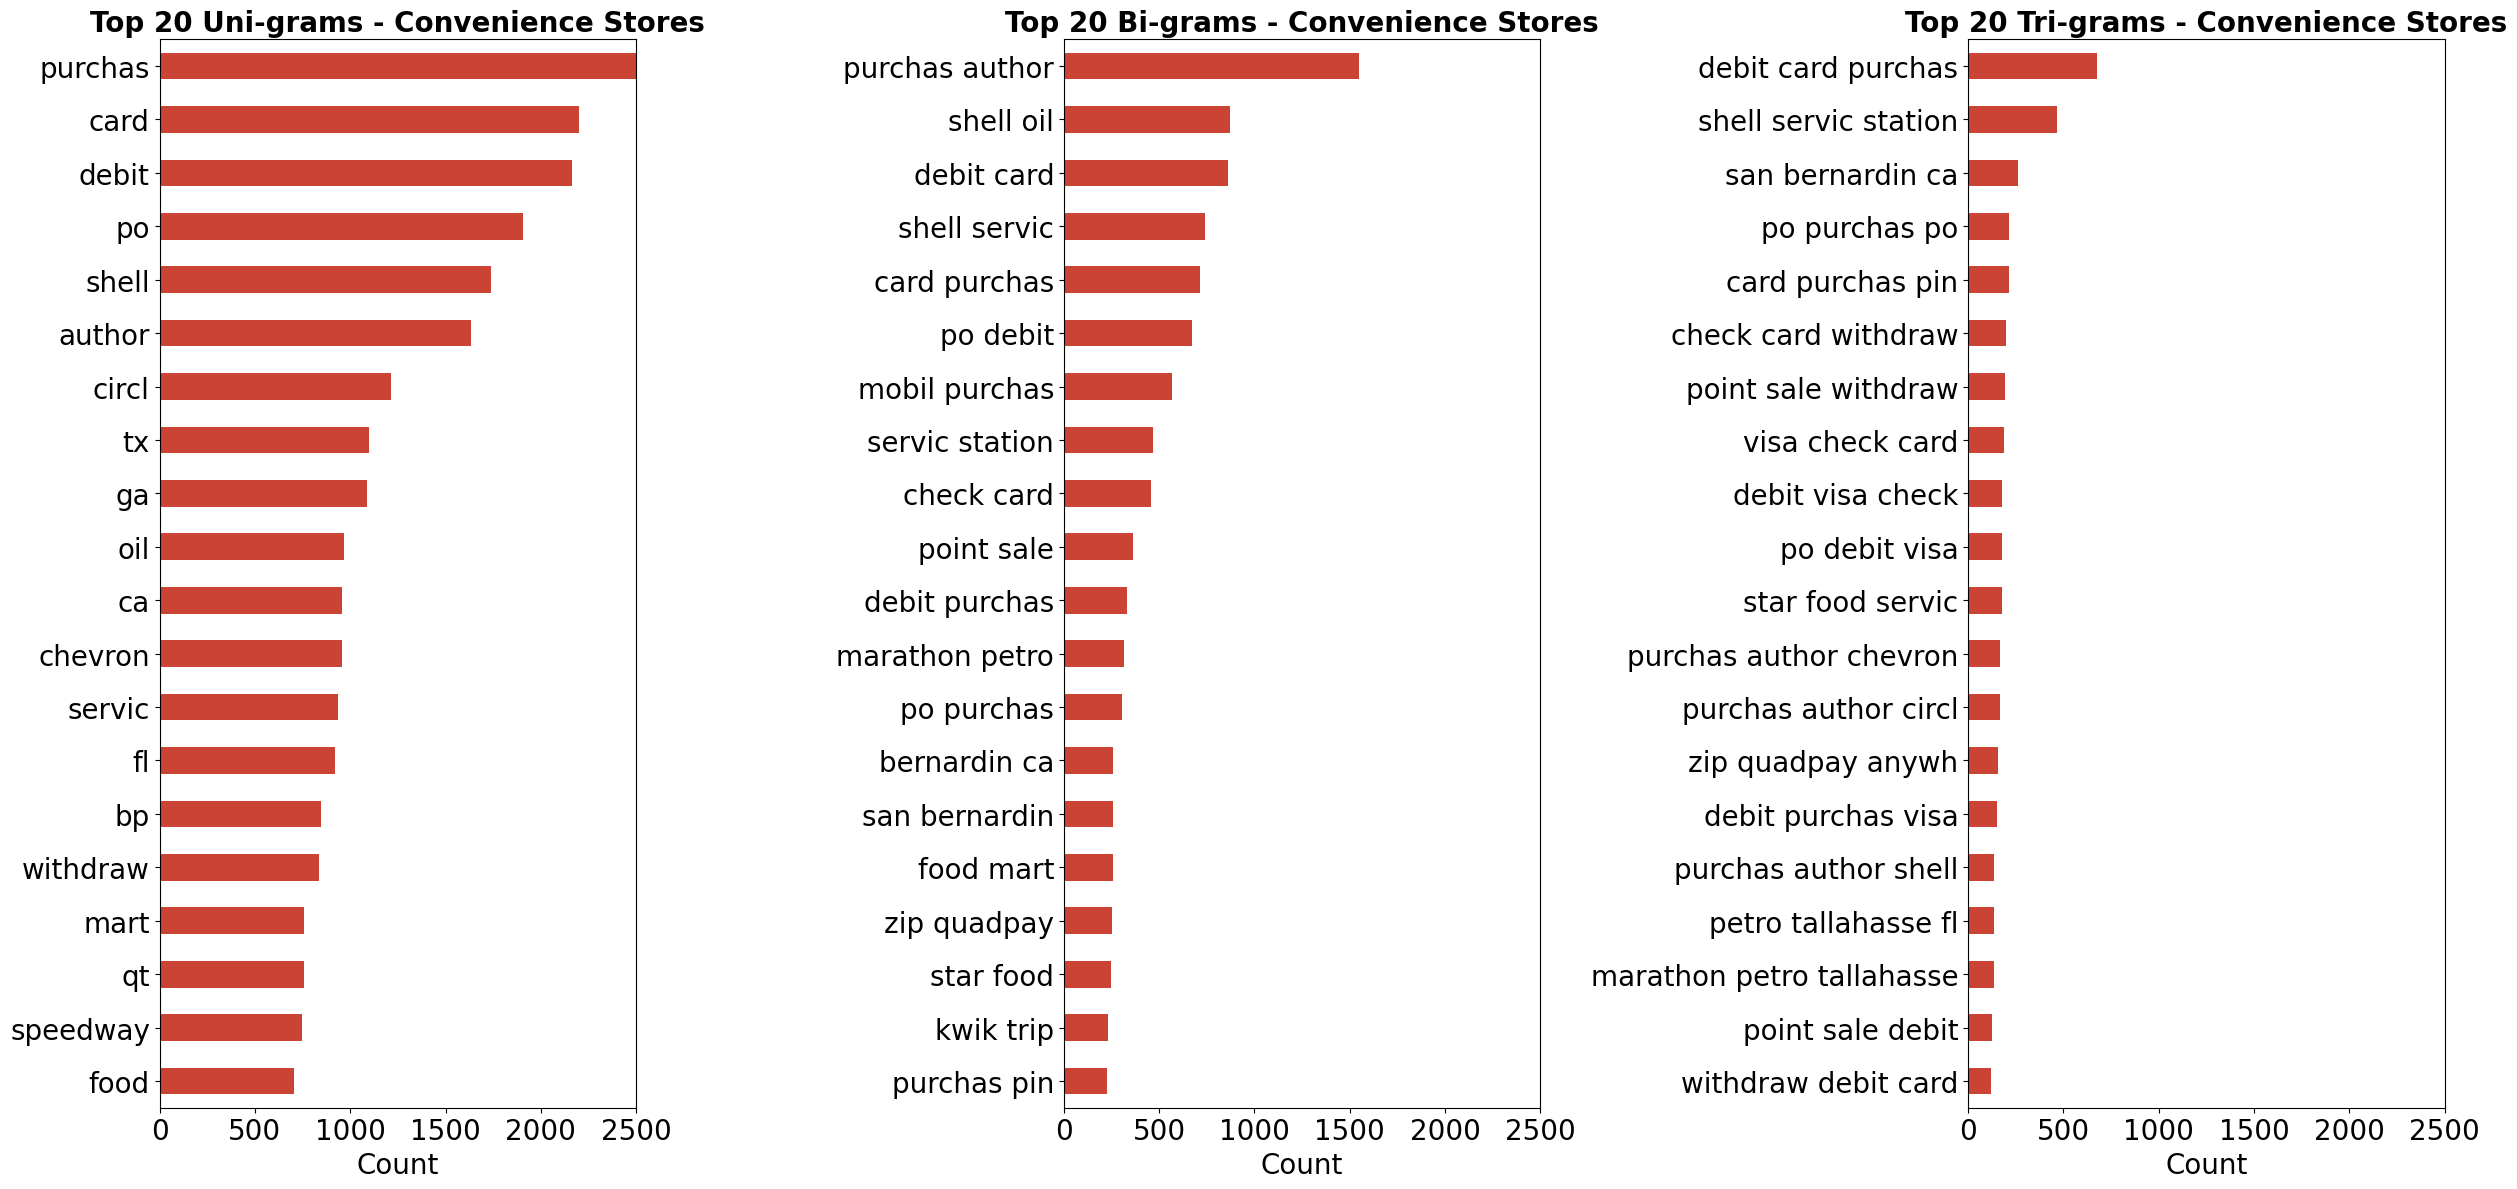

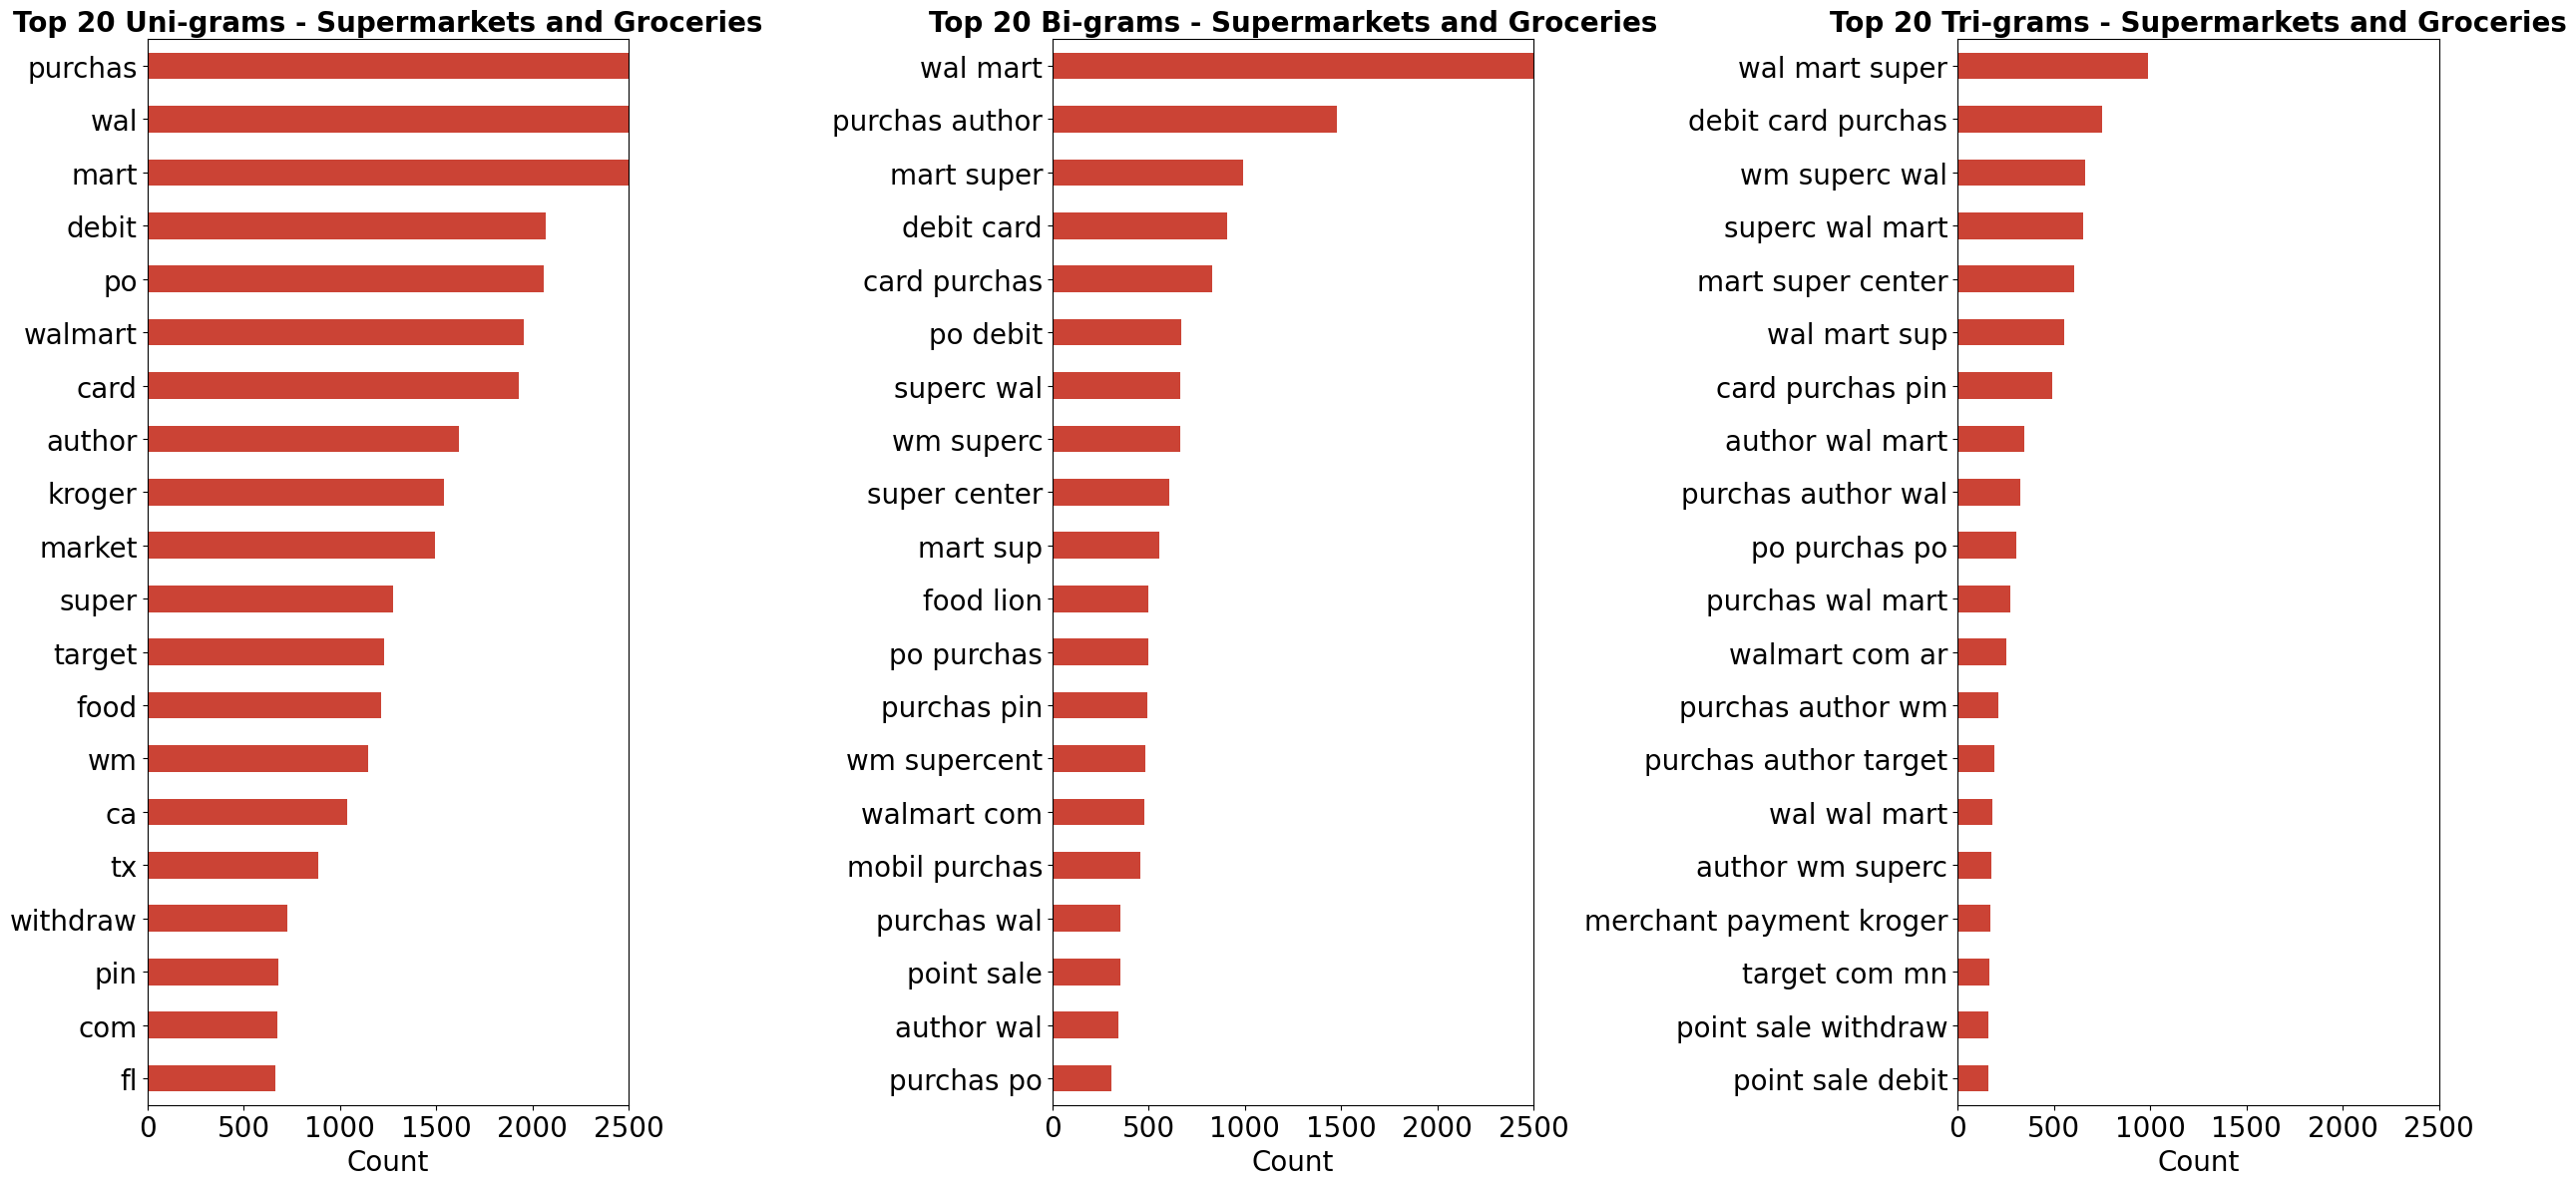

In [44]:
sizeable_categories = [
    'Uncategorized',
    'Third Party',
    'Restaurants',
    'Transfer Credit',
    'Loans',
    'Convenience Stores',
    'Supermarkets and Groceries',
]

# Plot the uni-grams, bi-grams and tri-grams for sizeable categories
for i in sizeable_categories:
    barplot_cvec(
        df=df_transaction,
        category=i,
        titles=[f'Top 20 Uni-grams - {i}', f'Top 20 Bi-grams - {i}', f'Top 20 Tri-grams - {i}'],
        color='#CB4335',
        xlimit=(0,2500)
    )

We noticed eaerlier that there was difference in frequency of transactions across time e.g., the no. of transactions on weekends was significantly less incomparion to weekdays (especially Mondays and Fridays). Hence, it may be useful to compare n-grams of transactions that occur on the different timeframes. **Unfortunately, due to compute constraints, we're unable to do this analysis.**

MemoryError: Unable to allocate 17.5 GiB for an array with shape (63061, 37341) and data type int64

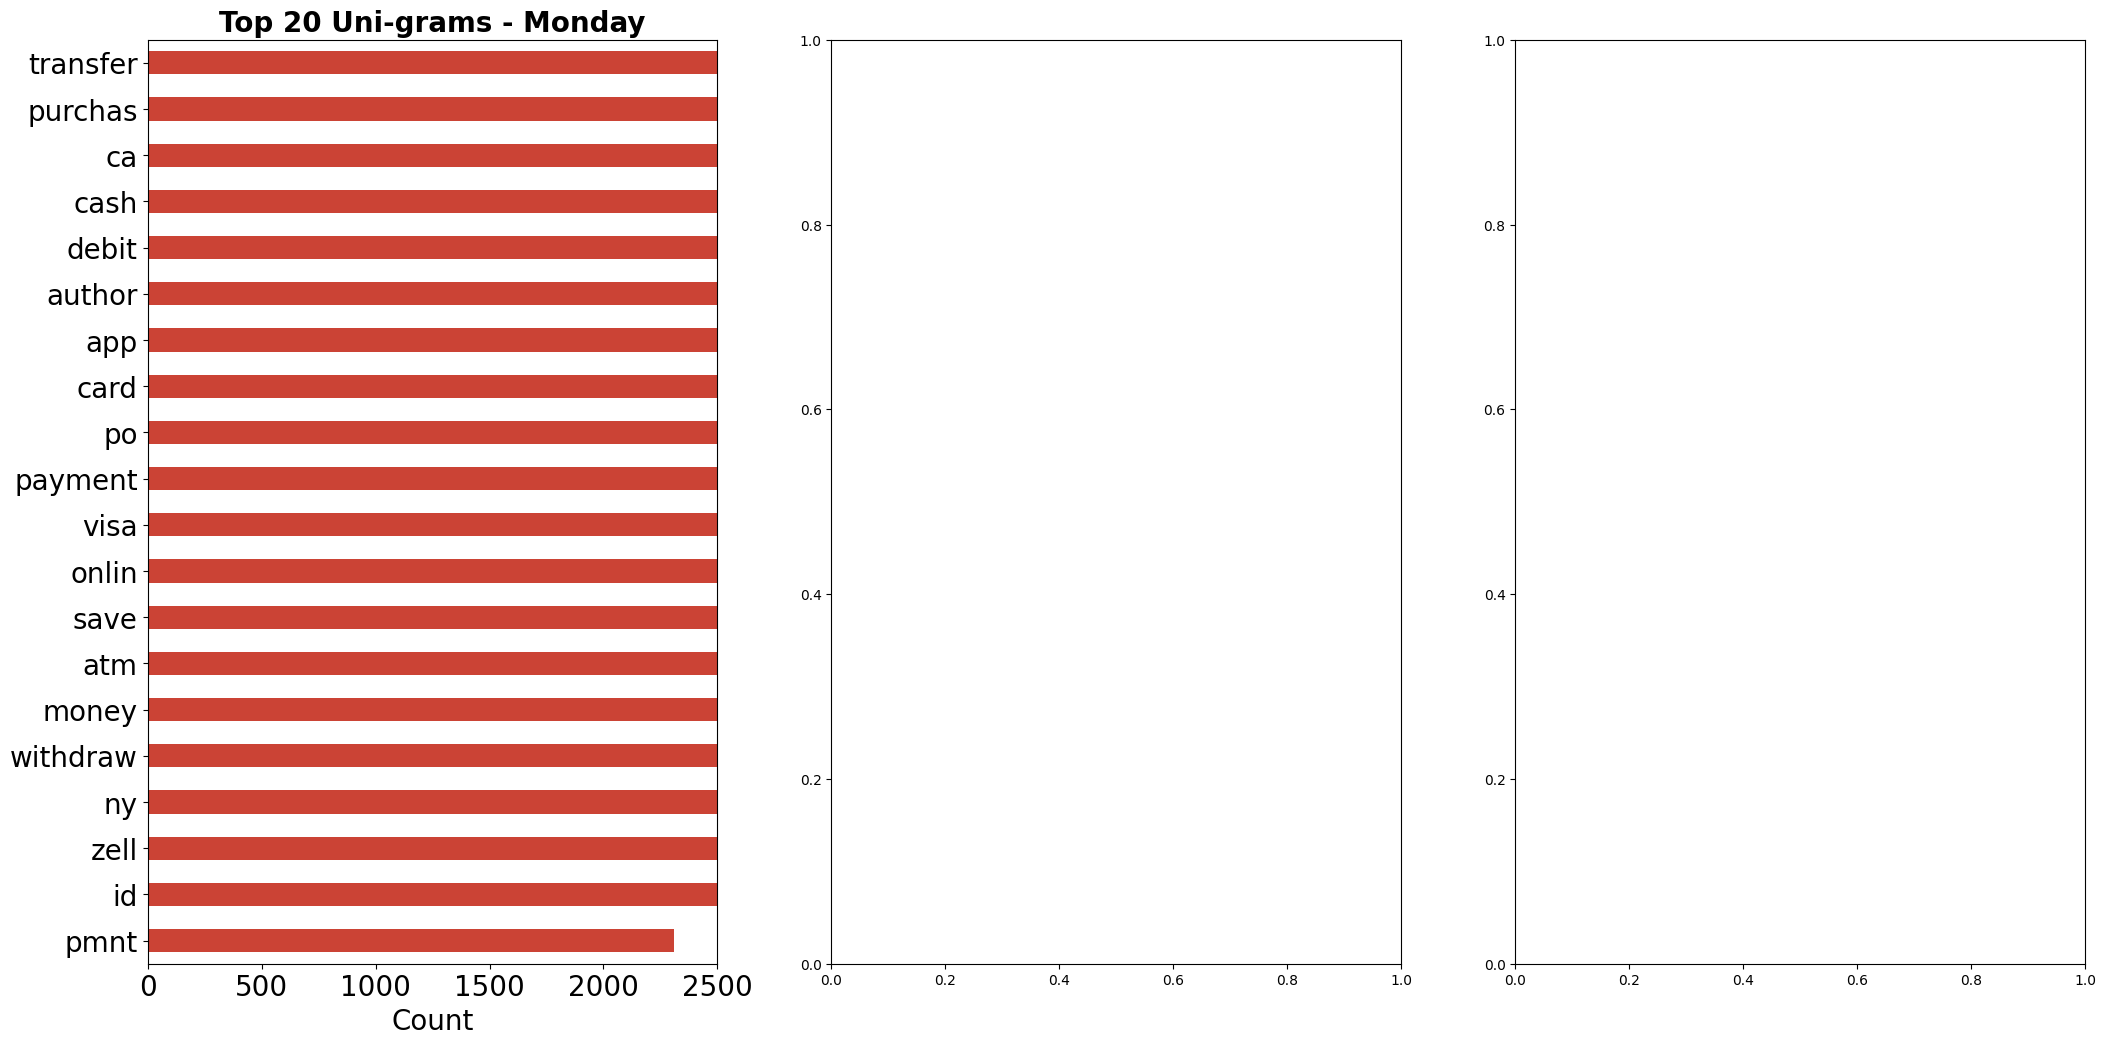

In [47]:
barplot_cvec(
    df=df_transaction[df_transaction["txn_date"].dt.day_name().isin(['Monday'])],
    titles=[f'Top 20 Uni-grams - Monday', f'Top 20 Bi-grams - Monday', f'Top 20 Tri-grams - Monday'],
    color='#CB4335',
    xlimit=(0,2500)
)

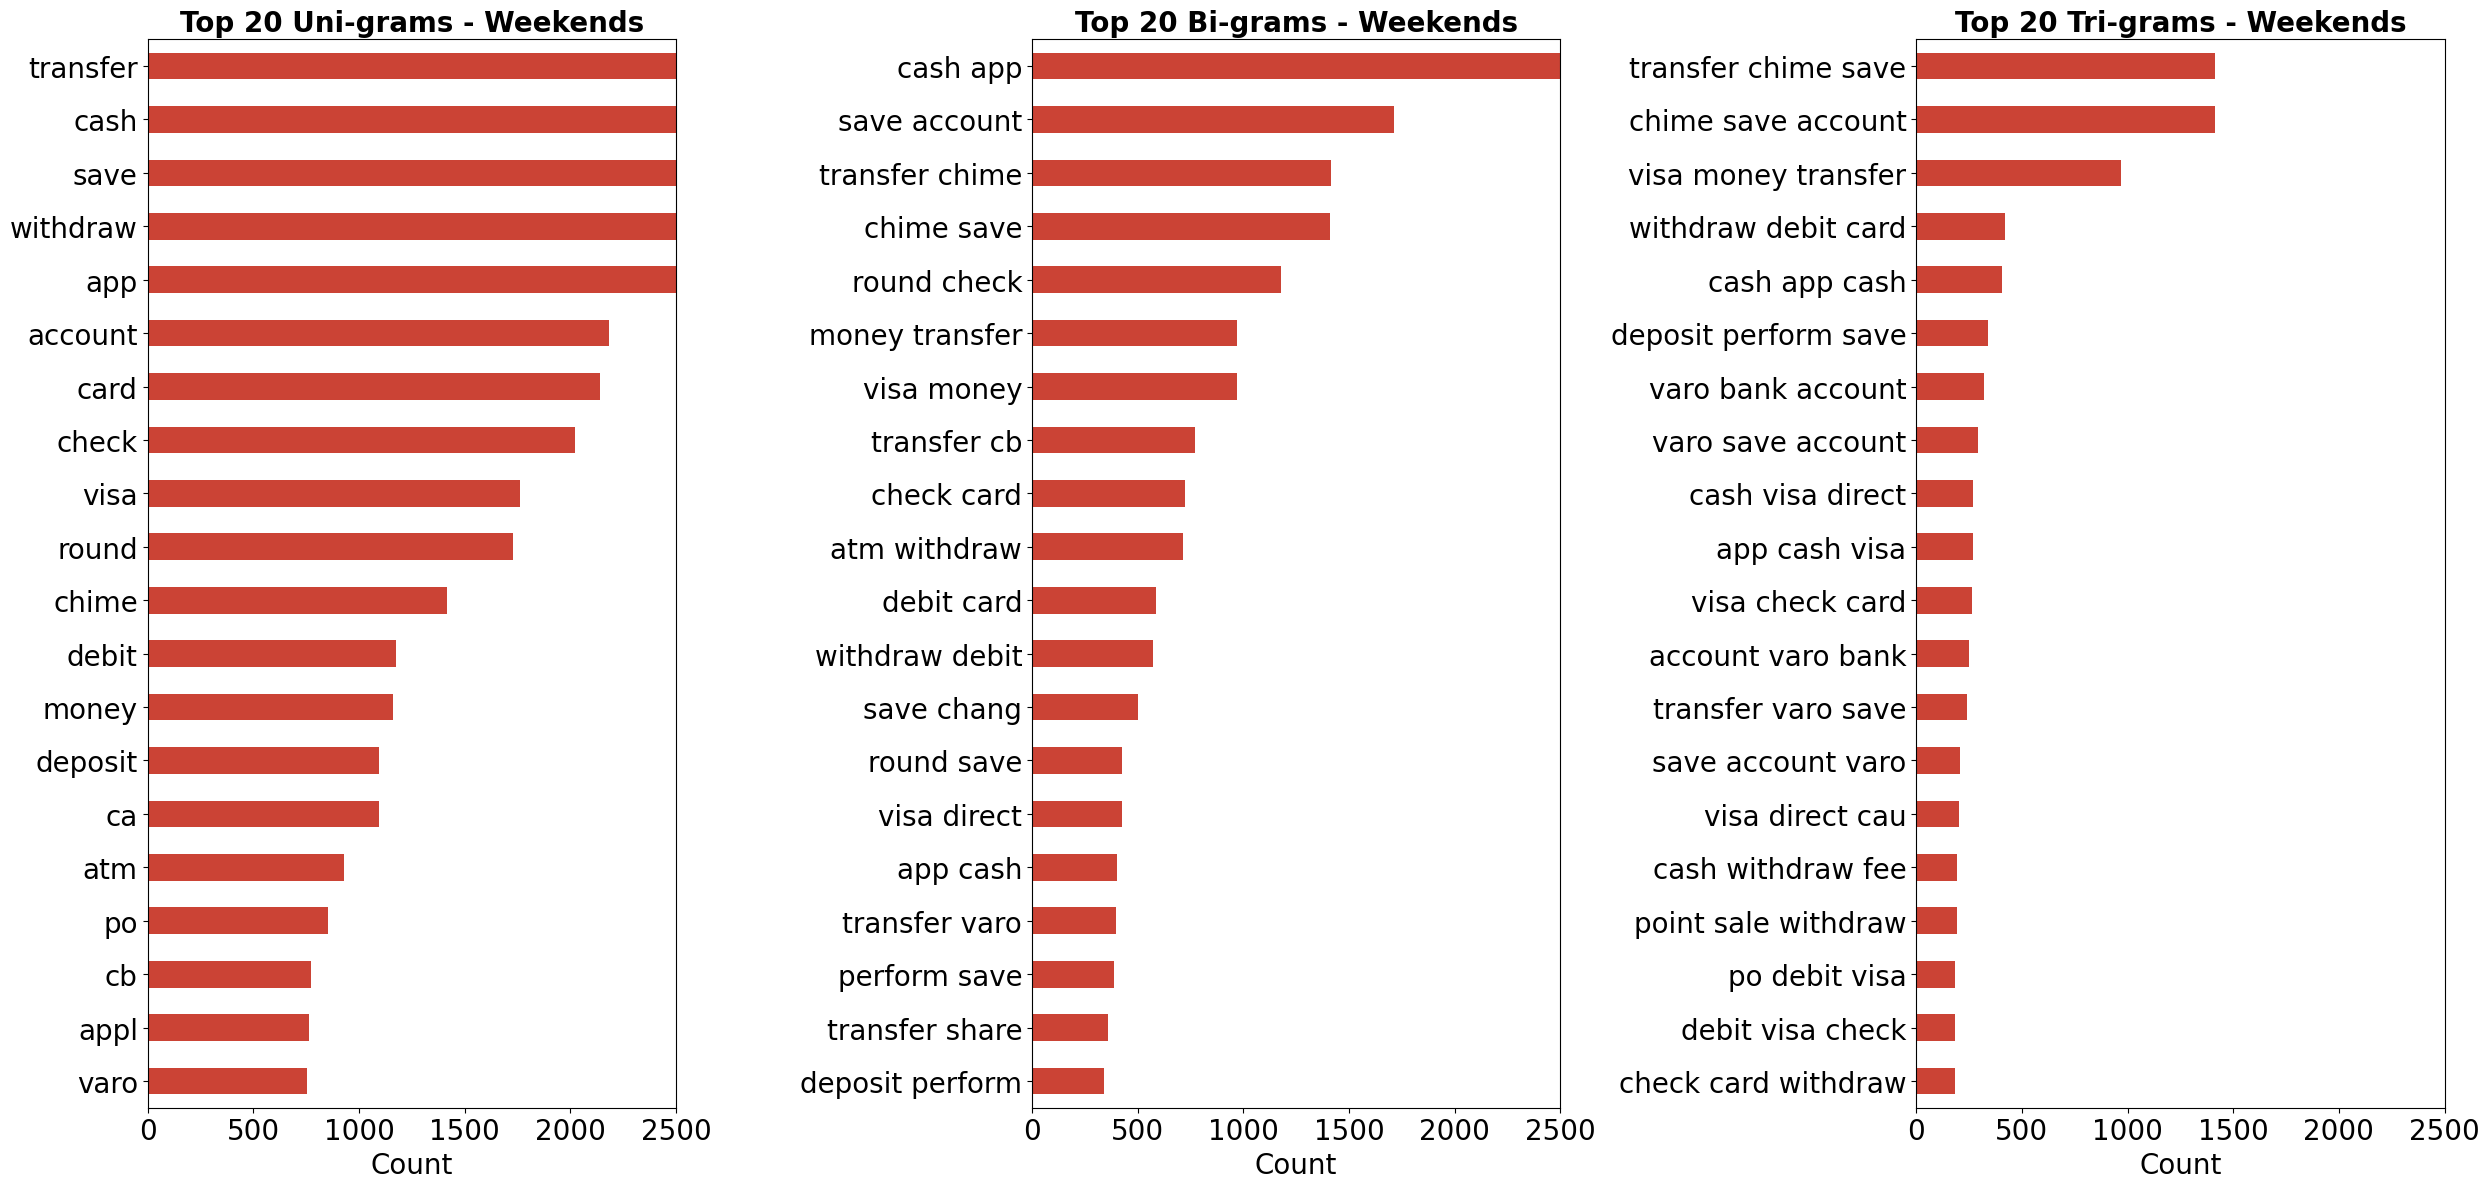

In [45]:
weekends = ["Sunday", "Saturday"]

barplot_cvec(
    df=df_transaction[df_transaction["txn_date"].dt.day_name().isin(weekends)],
    titles=[f'Top 20 Uni-grams - Weekends', f'Top 20 Bi-grams - Weekends', f'Top 20 Tri-grams - Weekends'],
    color='#CB4335',
    xlimit=(0,2500)
)

### 2.0 Analyze `user_profile.csv`

##### 2.1 Descriptive Statistics

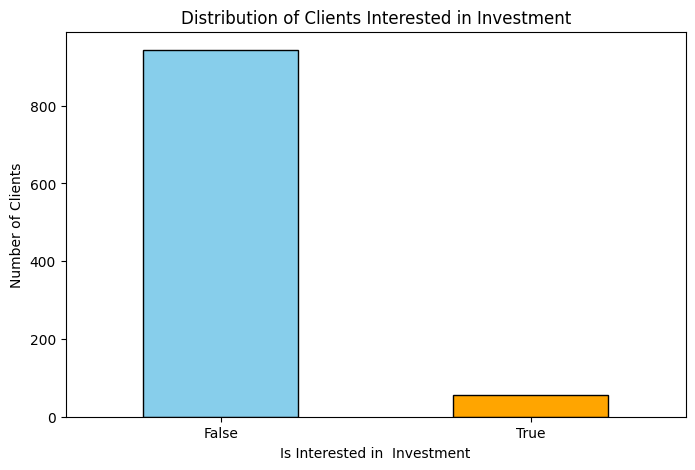

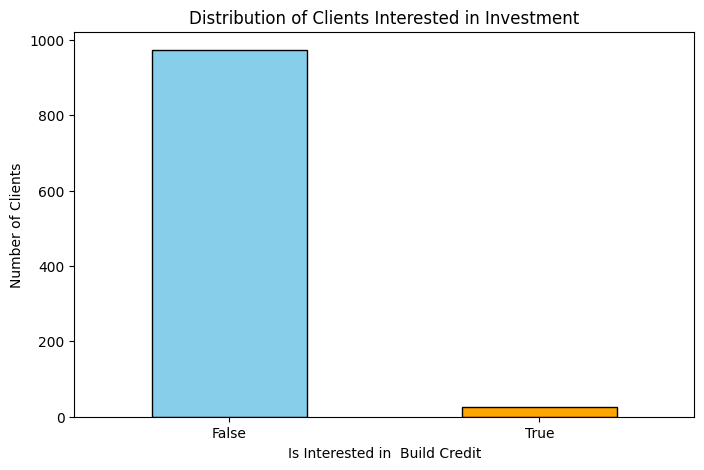

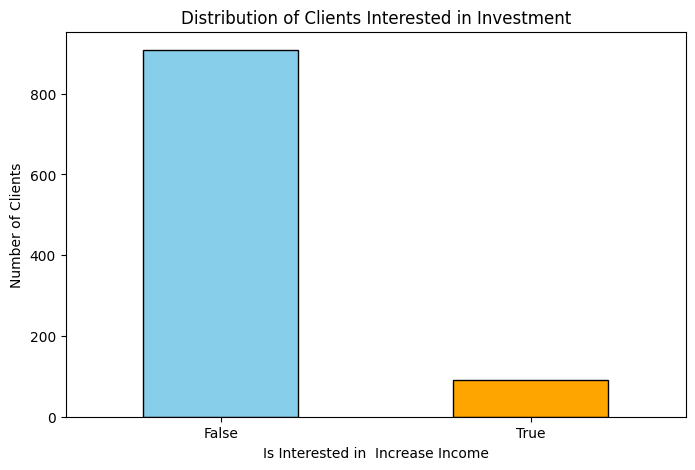

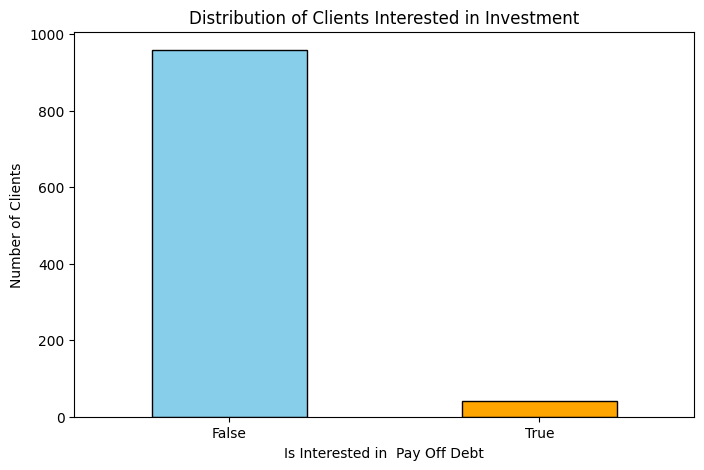

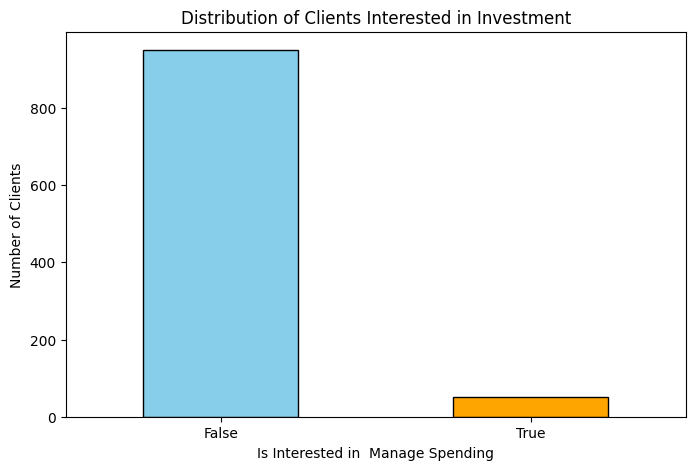

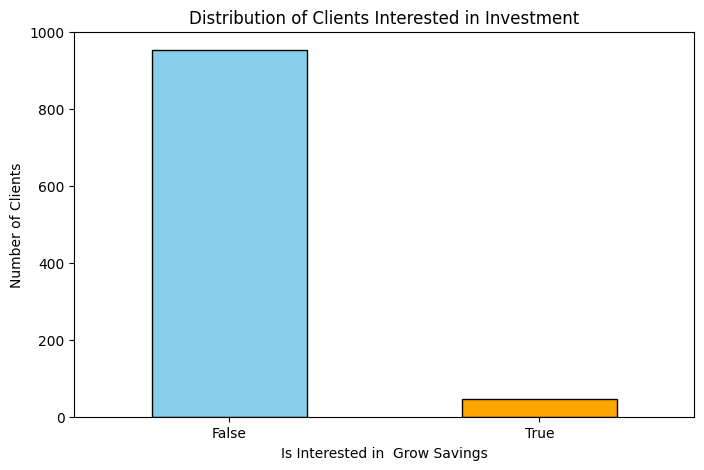

In [31]:
for x in df_user.columns:
    if x == 'CLIENT_ID':
        continue
    else:
        plt.figure(figsize=(8, 5))
        df_user.groupby(x)["CLIENT_ID"].count().plot(kind="bar", color=["skyblue", "orange"], edgecolor="black")
        plt.xlabel(f'Is Interested in {x.replace("IS_INTERESTED", "").replace("_", " ").title()}')
        plt.ylabel("Number of Clients")
        plt.title("Distribution of Clients Interested in Investment")
        plt.xticks([0, 1], ["False", "True"], rotation=0)
        plt.show()

In [46]:
cat_cols = [x for x in df_user.columns if x != 'CLIENT_ID']

for i in range(7):
    if i == 0:
        continue
    else:
        total_users = df_user[cat_cols].sum(axis=1).ge(i).sum()
        print(f'No. of users with {i} or more interests: {total_users} ({100 * total_users/1000:.2f}%)')

No. of users with 1 or more interests: 183 (18.30%)
No. of users with 2 or more interests: 87 (8.70%)
No. of users with 3 or more interests: 28 (2.80%)
No. of users with 4 or more interests: 11 (1.10%)
No. of users with 5 or more interests: 4 (0.40%)
No. of users with 6 or more interests: 1 (0.10%)


##### 2.2 User Transaction Level

In [60]:
user_transaction_count = df_transaction.groupby('client_id').agg(
    # we divide by 3 since our data is from June 1st to 30th September
    monthly_average_transaction_count=('client_id', lambda x: round(x.count() / 3))
).reset_index()

user_transaction_count

client_id  monthly_average_transaction_count
0            1                                  2
1            2                                 26
2            3                                 51
3            4                                 59
4            5                                  9
..         ...                                ...
875        876                                 21
876        877                                 58
877        878                                 19
878        879                                  3
879        880                              60311

[880 rows x 2 columns]

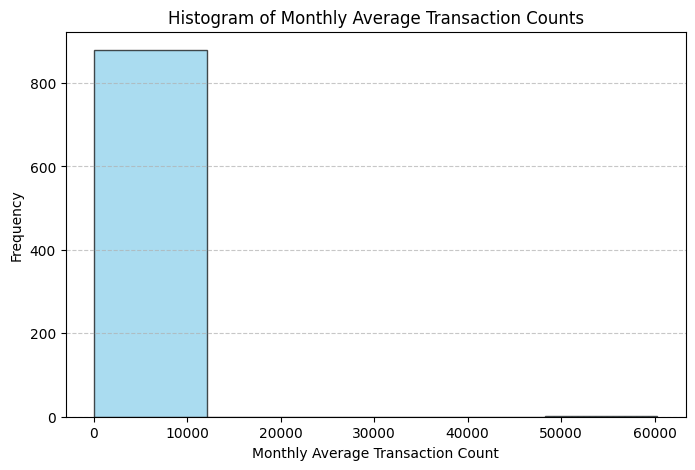

In [63]:
# Plotting a histogram for monthly_average_transaction_count
plt.figure(figsize=(8, 5))
plt.hist(user_transaction_count["monthly_average_transaction_count"], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.xlabel("Monthly Average Transaction Count")
plt.ylabel("Frequency")
plt.title("Histogram of Monthly Average Transaction Counts")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 3.0 Data Cleaning, Feature Engineering, Train-test Split & Save Datasets

20% of the original dataset will be set aside and used as a test set. This will be useful in evaluating our model's performance on unseen data. We will use stratification to preserve the class representation in our train and test set.

In [93]:
def clean_split_dataset():
    
    df_transaction = pd.read_csv('../data/bank_transaction.csv', parse_dates=['txn_date'])
    df_user = pd.read_csv('../data/user_profile.csv')

    ##### Transaction-level features #####
    df_transaction = df_transaction.loc[~df_transaction['category'].isnull()]
    df_transaction = df_transaction.loc[~df_transaction['description'].str.contains('CHECK111')]

    # Pre-process the raw text to remove stopwords
    stopwords_list = ['maryse', 'maryse hemant', 'hemant']
    df_transaction['description_stem'] = df_transaction['description'].map(lambda x: stem_text(raw_text=x, stopwords_list=stopwords_list))

    # Find the number of meaningful words in each transaction
    df_transaction['description_clean_len'] = df_transaction['description_stem'].str.split().map(len)

    # Drop the transactions that do not have any meaningful words  e.g., comprised of stopwords and numbers only
    df_transaction = df_transaction.drop(df_transaction[df_transaction['description_clean_len']==0].index)

    # Since we identified that the number of transactions differ between days of the week, we'll create features corresponding
    # to the day of the transaction
    df_transaction['day_monday'] = np.where(df_transaction["txn_date"].dt.day_name() == 'Monday', 1, 0)
    df_transaction['day_friday'] = np.where(df_transaction["txn_date"].dt.day_name() == 'Friday', 1, 0)
    df_transaction['day_weekend'] = np.where(df_transaction["txn_date"].dt.day_name().isin(['Saturday', 'Sunday']), 1, 0)

    ##### User-level features #####
    categories = list(df_transaction.category.unique())

    user_transaction_count = df_transaction.groupby('client_id').agg(
        monthly_transaction_count=('client_id', lambda x: round(x.count() / 3)),
        **{
            f"monthly_transaction_count_{str(category).lower().replace(' ', '_')}": (
                'category', 
                lambda x, cat=category: round((x == cat).sum() / 3)
            )
            for category in categories
        }
    ).reset_index()

    user_features = user_transaction_count.merge(df_user.astype(int), how='left', left_on='client_id', right_on='CLIENT_ID')
    user_features = user_features.drop(columns=['CLIENT_ID'])

    ##### Join User & Transaction-level features together #####
    df_final = df_transaction.merge(user_features, how='left', on='client_id')

    ##### Train-test Split
    # As we would like to stratify our target variable, we will need to first assign X and y
    X = df_final[[cols for cols in df_final.columns if cols != 'category']]
    y = df_final['category']

    # Perform a train_test_split to create a train and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Merge X_train and y_train back together using index
    train = pd.merge(X_train, y_train, left_index=True, right_index=True)

    # Merge X_test and y_test back together using index
    test = pd.merge(X_test, y_test, left_index=True, right_index=True)

    # Reindex the train and test set
    train.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)

    print(f'No. of unique categories in Train: {train.category.nunique()}')
    print(f'No. of unique categories in Test: {test.category.nunique()}')
    print("")
    print(f'Train size: {train.shape}')
    print(f'Test size: {test.shape}')

    # Save clean training set
    train.to_csv('../data/train.csv', index=False)
    test.to_csv('../data/test.csv', index=False)

    print("")
    print('Finished preparing datasets!')

    return (train, test)

In [94]:
train, test = clean_split_dataset()

/home/faiq0913/Personal-Projects/moneylion-financial-transaction-classification/notebooks/faiq_utils.py:31: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_text, "html.parser").get_text()


No. of unique categories in Train: 33
No. of unique categories in Test: 33

Train size: (199260, 53)
Test size: (49816, 53)

Finished preparing datasets!


In [95]:
train.head(3)

client_id  bank_id  account_id  txn_id   txn_date  \
0        577        1           2      90 2023-08-14   
1         94        8           8     159 2023-09-18   
2        880      770         887   99720 2023-06-16   

                                                description  amount  \
0  Online Banking transfer from CHK 6479 Confirmation# 1425     6.0   
1                                                   DEPOSIT     5.0   
2    Bulk 7202 Apple 1920 EAST WISCONSI APPLETON       WIUS   -10.9   

                       description_stem  description_clean_len  day_monday  \
0       onlin bank transfer chk confirm                      5           1   
1                               deposit                      1           1   
2  bulk appl east wisconsi appleton wiu                      6           0   

   day_friday  day_weekend  monthly_transaction_count  \
0           0            0                         56   
1           0            0                        136   
2           1            0                      60311   

   monthly_transaction_count_loans  monthly_transaction_count_transfer_credit  \
0                                1                                         13   
1                               23                                          4   
2                             2789                                        806   

   monthly_transaction_count_transfer_deposit  \
0                                           1   
1                                          15   
2                                         118   

   monthly_transaction_count_payroll  monthly_transaction_count_uncategorized  \
0                                  3                                        4   
1                                 17                                       15   
2                                  0                                     7491   

   monthly_transaction_count_restaurants  \
0                                      0   
1                                      0   
2                                   7586   

   monthly_transaction_count_check_deposit  \
0                                        0   
1                                        0   
2                                        1   

   monthly_transaction_count_third_party  \
0                                      8   
1                                      0   
2                                   6729   

   monthly_transaction_count_food_and_beverage_services  \
0                                                     0   
1                                                     0   
2                                                   110   

   monthly_transaction_count_internal_account_transfer  \
0                                                   25   
1                                                   56   
2                                                 1801   

   monthly_transaction_count_shops  \
0                                0   
1                                0   
2                             2122   

   monthly_transaction_count_supermarkets_and_groceries  \
0                                                     1   
1                                                     0   
2                                                  5170   

   monthly_transaction_count_telecommunication_services  \
0                                                     1   
1                                                     0   
2                                                    23   

   monthly_transaction_count_bank_fees  monthly_transaction_count_utilities  \
0                                    0                                    0   
1                                    5                                    0   
2                                 2005                                 1314   

   monthly_transaction_count_insurance  \
0                                    0   
1                                    0   
2                        

Let's do one final check on null values!

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199260 entries, 0 to 199259
Data columns (total 53 columns):
 #   Column                                                Non-Null Count   Dtype         
---  ------                                                --------------   -----         
 0   client_id                                             199260 non-null  int64         
 1   bank_id                                               199260 non-null  int64         
 2   account_id                                            199260 non-null  int64         
 3   txn_id                                                199260 non-null  int64         
 4   txn_date                                              199260 non-null  datetime64[ns]
 5   description                                           199260 non-null  object        
 6   amount                                                199260 non-null  float64       
 7   description_stem                                      199260 non-

In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49816 entries, 0 to 49815
Data columns (total 53 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   client_id                                             49816 non-null  int64         
 1   bank_id                                               49816 non-null  int64         
 2   account_id                                            49816 non-null  int64         
 3   txn_id                                                49816 non-null  int64         
 4   txn_date                                              49816 non-null  datetime64[ns]
 5   description                                           49816 non-null  object        
 6   amount                                                49816 non-null  float64       
 7   description_stem                                      49816 non-null  object